**1. Probability Distributions** In studying signals, we require the help of
random variables to model the randomness in them. This randomness is
also useful in predicting the nature of noise.

**• Continuous distributions** Plot the PDF and CDF for the following
distributions by taking at least three different sets of parameters for
each. Vary the parameters to get at least 3 different realizations of
each: Uniform (a,b), Exponential (λ), Gamma (γ), Beta (β), Gaus-
sian (μ,σ), Standard Normal (0, 1), Chi-squared (k).

Calculate the mean median
mode and variance and plot it with the PDF in a single plot for one
distribution. Also draw the CDFs separately.

In [ ]:
def integ(fx,x):    # function to integrate pdf into cdf using trapezoidal rule
  import numpy as np
  sum=0
  cdf=[]
  for ser in range(2000):
    #print(ser)
    integ=np.trapz(fx[0:ser],dx=1/100)
    cdf.append(integ)
  return cdf

def f_mean(fx,x):
  xfx = []
  for i in range(len(fx)):
    xfx.append(fx[i]*x[i])
  return np.trapz(xfx,dx=1/100)

def f_median(fx):
  area=np.trapz(fx,dx=1/100)
  areas=[]
  for i in range(len(fx)):
    curr_area=np.trapz(fx[0:i],dx=1/100)
    areas.append(abs(curr_area-area/2))
  for i in range(len(areas)):
    if areas[i]==min(areas):
      return (i/100)-10

def f_mode(fx):
  for i in range(len(fx)):
    if fx[i]==max(fx):
      return (i/100)-10

def f_variance(fx,x):
  mu=f_mean(fx,x)
  var=[]
  for i in range(len(fx)):
    var.append(((x[i]-mu)**2) * fx[i])
  return np.trapz(var,dx=1/100)


UNIFORM DISTRIBUTIONS:


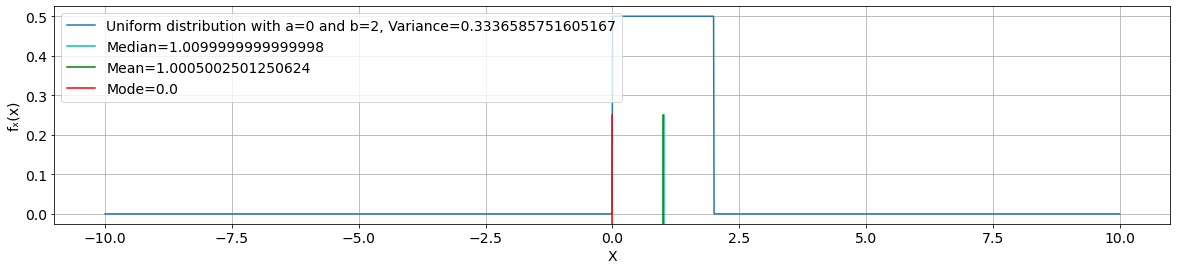

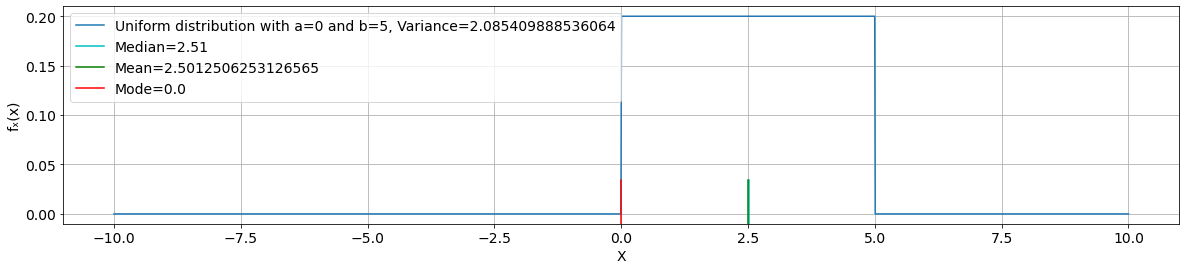

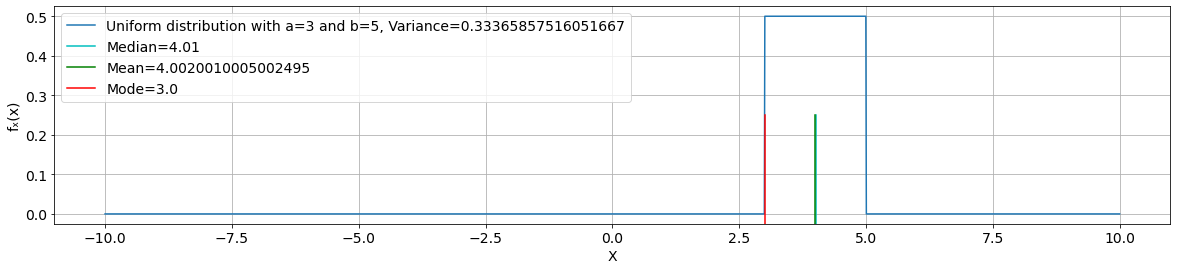

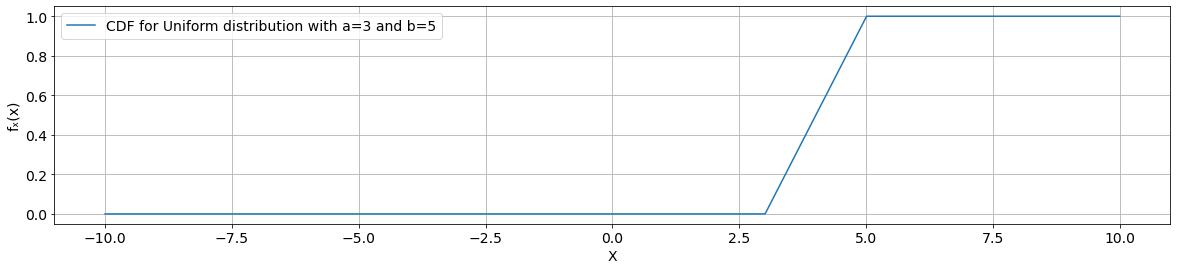

In [298]:
import matplotlib.pyplot as plt
import numpy as np
import math

def plot_uniform(start,end):
  stretch=end-start
  x=np.linspace(-10,10,2000)
  start_index=start*100
  end_index=end*100
  fx=[0]*(start_index+1000) + [1/(end-start)]*(end_index-start_index)+[0]*(1000-end_index)
  plt.figure(figsize=(20,4))
  plt.rcParams.update({'font.size':14})
  plt.plot(x, fx,label=f'Uniform distribution with a={start} and b={end}, Variance={f_variance(fx,x)}')
  #plt.vlines(x=[f_mean(fx,x),f_median(fx)],ymin=min(fx),ymax=max(fx),colors=['g','c'],label=['Mean','Median'])
  plt.axvline(x=f_median(fx),ymin=min(fx),ymax=max(fx),color='c',label=f'Median={f_median(fx)}')  
  plt.axvline(x=f_mean(fx,x),ymin=min(fx),ymax=max(fx),color='g',label=f'Mean={f_mean(fx,x)}')  
  plt.axvline(x=f_mode(fx),ymin=min(fx),ymax=max(fx),color='r',label=f'Mode={f_mode(fx)}') 
  #plt.axvline(x=f_variance(fx,x),ymin=min(fx),ymax=max(fx),color='g',label='Variance')  
  plt.xlabel('X')
  plt.ylabel(u'f\u2093(x)')
  plt.grid()
  plt.legend(loc='upper left')
  plt.show()

print('UNIFORM DISTRIBUTIONS:')
plot_uniform(0,2)
plot_uniform(0,5)
plot_uniform(3,5)

start=3
end=5
stretch=end-start
x=np.linspace(-10,10,2000)
start_index=start*100
end_index=end*100
fx=[0]*(start_index+1000) + [1/(end-start)]*(end_index-start_index)+[0]*(1000-end_index)
plt.figure(figsize=(20,4))
plt.rcParams.update({'font.size':14})
plt.plot(x, integ(fx,x),label=f'CDF for Uniform distribution with a={start} and b={end}')
plt.xlabel('X')
plt.ylabel(u'f\u2093(x)')
plt.grid()
plt.legend(loc='upper left')
plt.show()

EXPONENTIAL DISTRIBUTIONS:


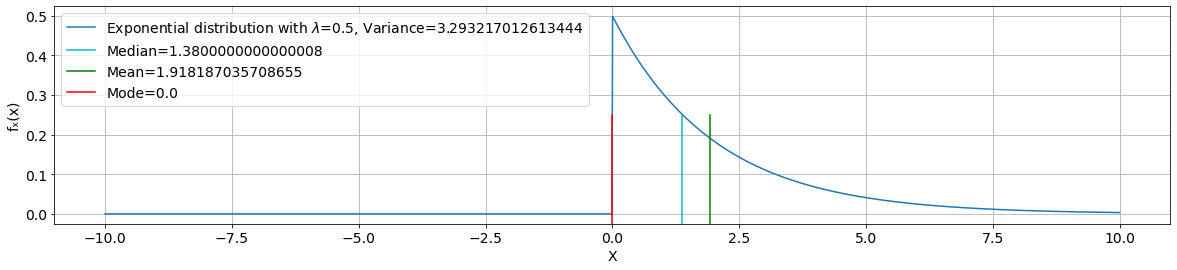

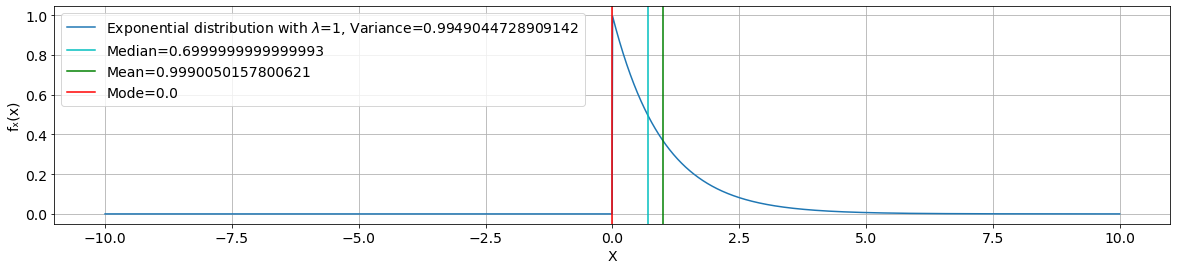

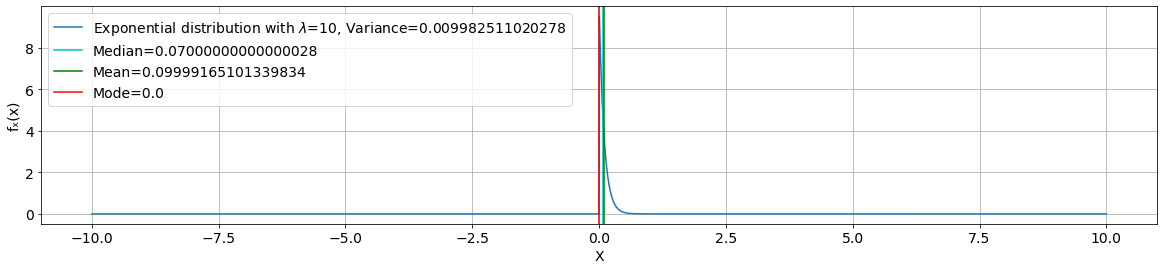

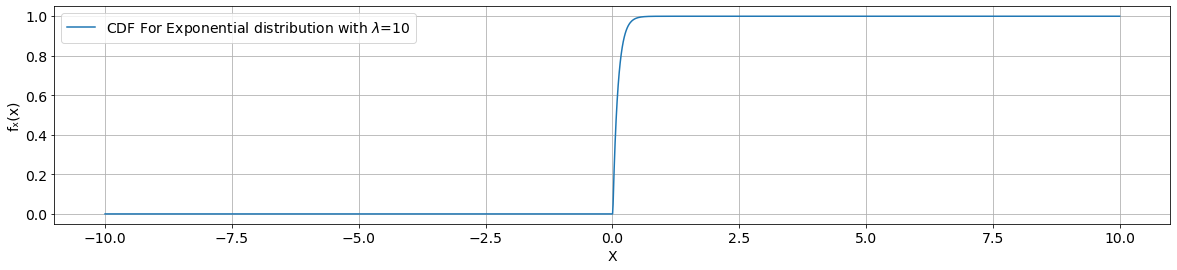

In [297]:
import matplotlib.pyplot as plt
import numpy as np
import math

def plot_exponential(lambd):
  scale=1/lambd
  x=np.linspace(-10,10,2000)
  fx=[]
  for i in x:
    if(i<0):
      fx.append(0)
    else:
      fx.append(lambd*np.exp(-lambd*i))
  plt.figure(figsize=(20,4))
  plt.rcParams.update({'font.size':14})
  plt.plot(x,fx,label=f'Exponential distribution with $\lambda$={lambd}, Variance={f_variance(fx,x)}')
  plt.axvline(x=f_median(fx),ymin=min(fx),ymax=max(fx),color='c',label=f'Median={f_median(fx)}')  
  plt.axvline(x=f_mean(fx,x),ymin=min(fx),ymax=max(fx),color='g',label=f'Mean={f_mean(fx,x)}')  
  plt.axvline(x=f_mode(fx),ymin=min(fx),ymax=max(fx),color='r',label=f'Mode={f_mode(fx)}') 
  plt.xlabel('X')
  plt.ylabel(u'f\u2093(x)')
  plt.grid()
  plt.legend(loc='upper left')
  plt.show()

print('EXPONENTIAL DISTRIBUTIONS:')
plot_exponential(0.5)
plot_exponential(1)
plot_exponential(10)

lambd=10
scale=1/lambd
x=np.linspace(-10,10,2000)
fx=[]
for i in x:
  if(i<0):
    fx.append(0)
  else:
    fx.append(lambd*np.exp(-lambd*i))
plt.figure(figsize=(20,4))
plt.rcParams.update({'font.size':14})
plt.plot(x, integ(fx,x),label=f'CDF For Exponential distribution with $\lambda$={lambd}')
plt.xlabel('X')
plt.ylabel(u'f\u2093(x)')
plt.grid()
plt.legend(loc='upper left')
plt.show()

GAMMA DISTRIBUTIONS:
Shape parameter=α
Scale parameter=β


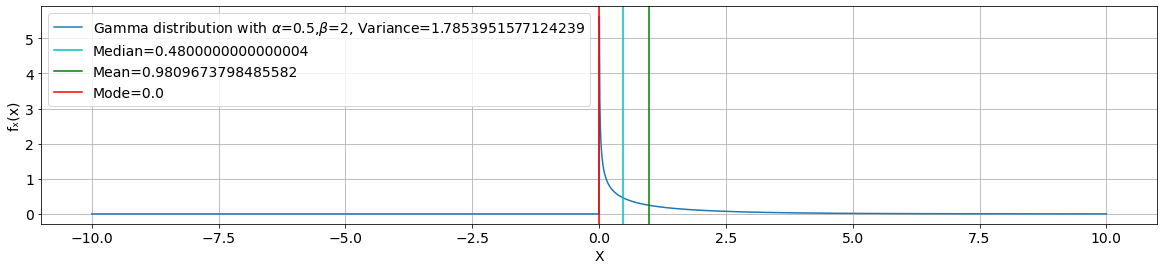

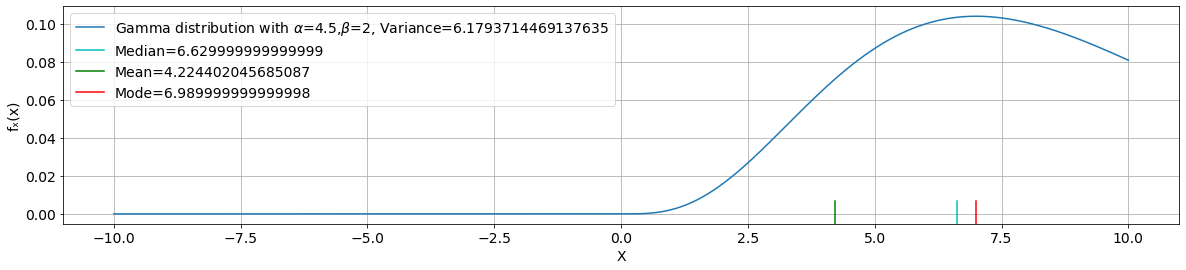

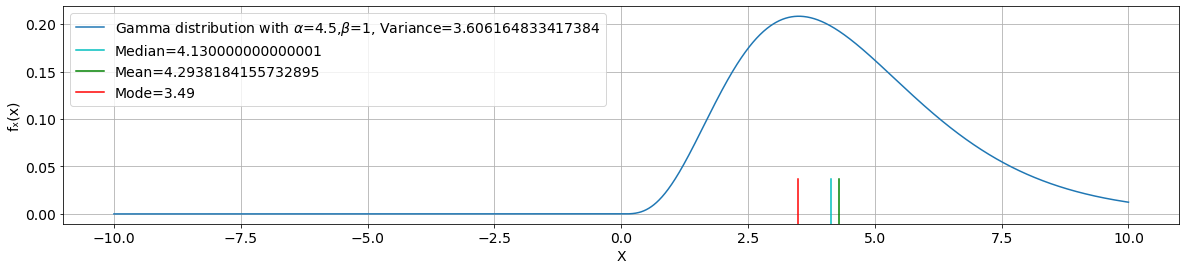

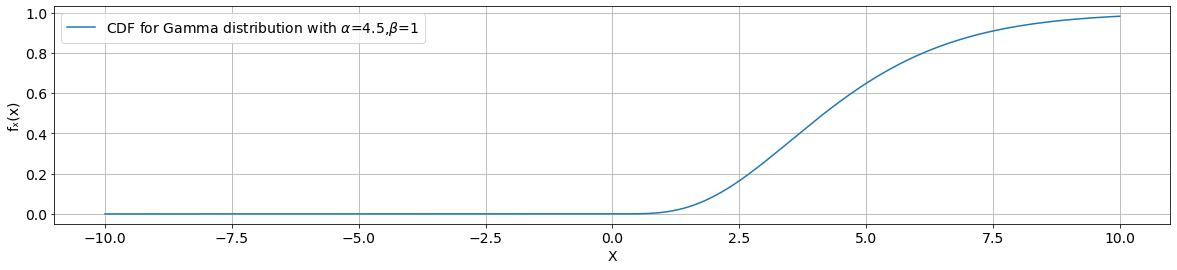

In [296]:
import matplotlib.pyplot as plt
import numpy as np
import math

def plot_gamma(alpha,beta):
  
  x=np.linspace(-10,10,2000)
  fx=[]
  for i in x:
    if(i<0):
      fx.append(0)
    else:
      fx.append( ((beta**(-alpha)) * i**(alpha-1) * np.exp(-i/beta)) / math.gamma(alpha)  )
  plt.figure(figsize=(20,4))
  plt.rcParams.update({'font.size':14})
  plt.plot(x,fx,label=fr'Gamma distribution with $\alpha$={alpha},$\beta$={beta}, Variance={f_variance(fx,x)}')
  plt.axvline(x=f_median(fx),ymin=min(fx),ymax=max(fx),color='c',label=f'Median={f_median(fx)}')  
  plt.axvline(x=f_mean(fx,x),ymin=min(fx),ymax=max(fx),color='g',label=f'Mean={f_mean(fx,x)}')  
  plt.axvline(x=f_mode(fx),ymin=min(fx),ymax=max(fx),color='r',label=f'Mode={f_mode(fx)}')
  plt.xlabel('X')
  plt.ylabel(u'f\u2093(x)')
  plt.grid()
  plt.legend(loc='upper left')
  plt.show()

print('GAMMA DISTRIBUTIONS:')
print(u'Shape parameter=\u03b1')
print(u'Scale parameter=\u03b2')
plot_gamma(0.5,2)
plot_gamma(4.5,2)
plot_gamma(4.5,1)

alpha=4.5
beta=1
x=np.linspace(-10,10,2000)
fx=[]
for i in x:
  if(i<0):
    fx.append(0)
  else:
    fx.append( ((beta**(-alpha)) * i**(alpha-1) * np.exp(-i/beta)) / math.gamma(alpha)  )
plt.figure(figsize=(20,4))
plt.rcParams.update({'font.size':14})
plt.plot(x,integ(fx,x),label=fr'CDF for Gamma distribution with $\alpha$={alpha},$\beta$={beta}')
plt.xlabel('X')
plt.ylabel(u'f\u2093(x)')
plt.grid()
plt.legend(loc='upper left')
plt.show()

BETA DISTRIBUTIONS:
Shape parameters=α and β


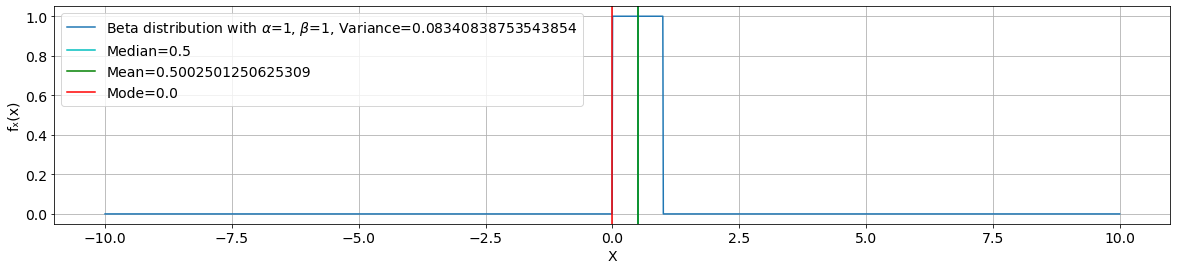

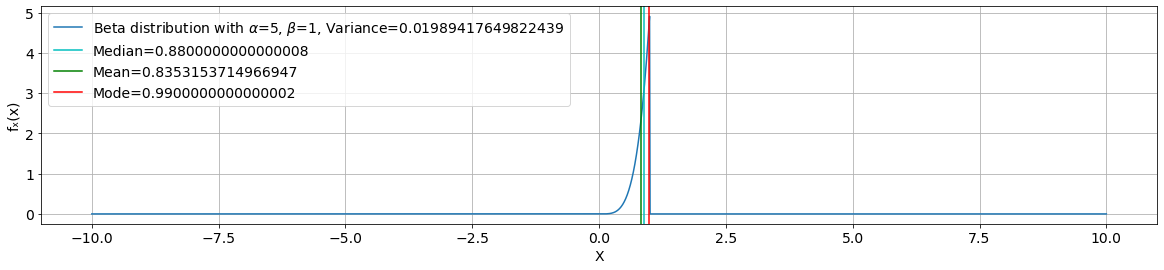

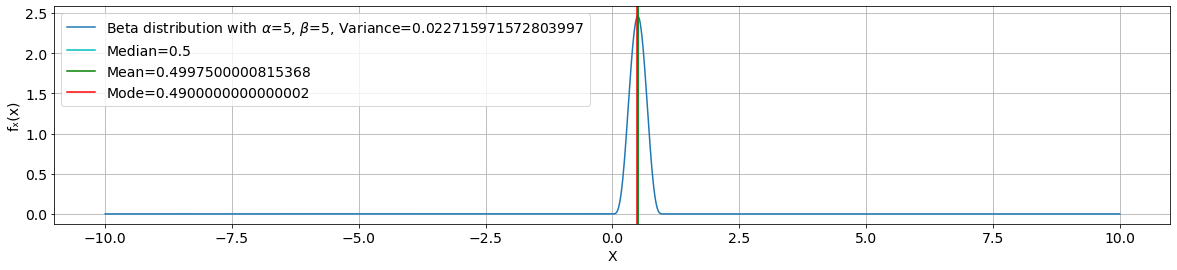

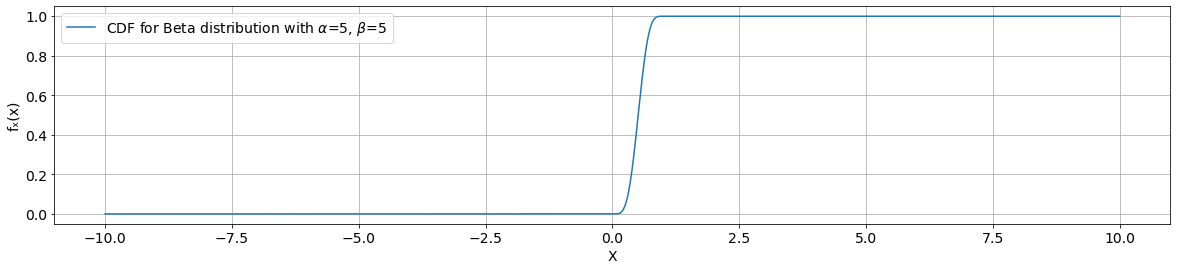

In [295]:
import matplotlib.pyplot as plt
import numpy as np
from math import gamma as gamma

def plot_beta(a,b):
  
  x=np.linspace(-10,10,2000)
  fx=[]
  for i in x:
    if(i<0 or i>1):
      fx.append(0)
    else:
      fx.append( ( gamma(a+b)/(gamma(a)*gamma(b)) * i**(a-1) *(1-i)**(b-1)) )
  plt.figure(figsize=(20,4))
  plt.rcParams.update({'font.size':14})
  plt.plot(x,fx,label=fr'Beta distribution with $\alpha$={a}, $\beta$={b}, Variance={f_variance(fx,x)}')
  plt.axvline(x=f_median(fx),ymin=min(fx),ymax=max(fx),color='c',label=f'Median={f_median(fx)}')  
  plt.axvline(x=f_mean(fx,x),ymin=min(fx),ymax=max(fx),color='g',label=f'Mean={f_mean(fx,x)}')  
  plt.axvline(x=f_mode(fx),ymin=min(fx),ymax=max(fx),color='r',label=f'Mode={f_mode(fx)}')
  plt.xlabel('X')
  plt.ylabel(u'f\u2093(x)')
  plt.grid()
  plt.legend(loc='upper left')
  plt.show()

print('BETA DISTRIBUTIONS:')
print(u'Shape parameters=\u03b1 and \u03b2')
plot_beta(1,1)
plot_beta(5,1)
plot_beta(5,5)

a=5
b=5
x=np.linspace(-10,10,2000)
fx=[]
for i in x:
  if(i<0 or i>1):
    fx.append(0)
  else:
    fx.append( ( gamma(a+b)/(gamma(a)*gamma(b)) * i**(a-1) *(1-i)**(b-1)) )
plt.figure(figsize=(20,4))
plt.rcParams.update({'font.size':14})
plt.plot(x, integ(fx,x),label=fr'CDF for Beta distribution with $\alpha$={a}, $\beta$={b}')
plt.xlabel('X')
plt.ylabel(u'f\u2093(x)')
plt.grid()
plt.legend(loc='upper left')
plt.show()

GAUSSIAN DISTRIBUTIONS:


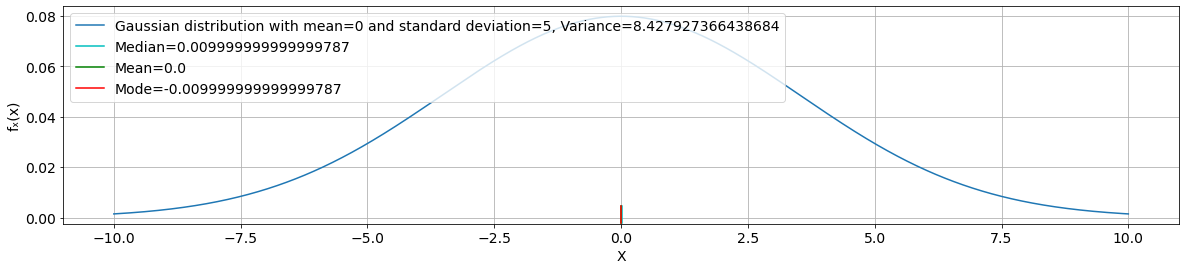

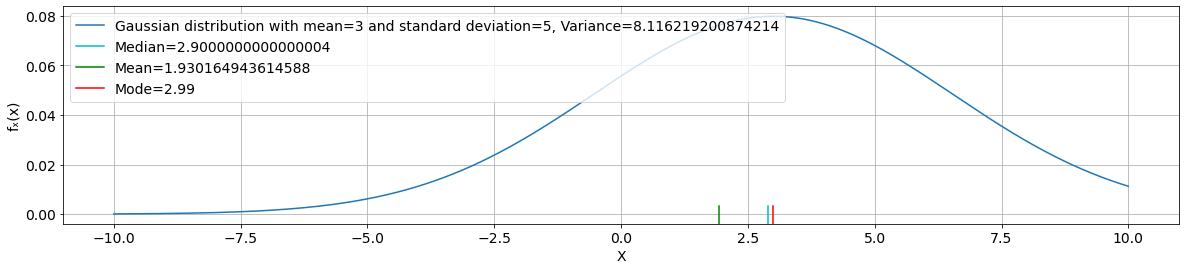

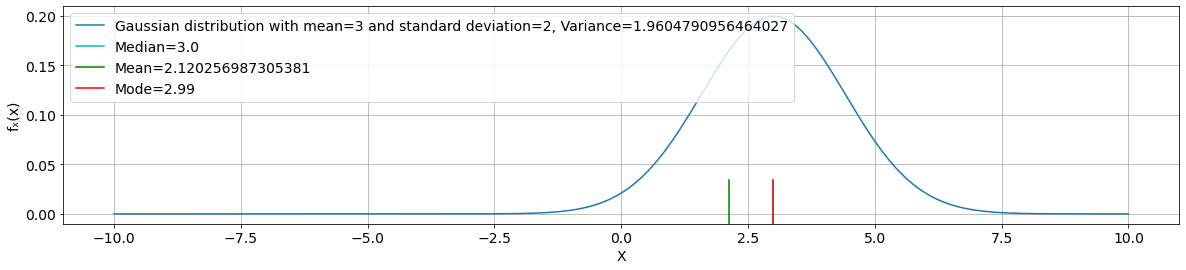

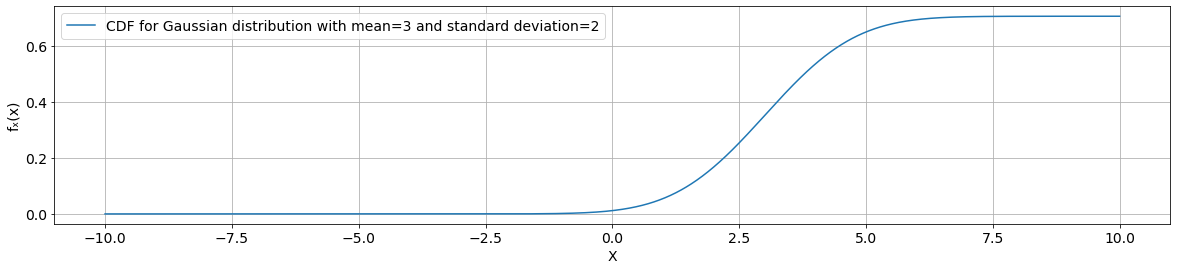

In [294]:
import matplotlib.pyplot as plt
import numpy as np
import math

def plot_gaussian(mu,sigma):
  #x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100*sigma)
  x=np.linspace(-10,10,2000)
  fx=[]
  for i in x:
    fx.append( (1/(math.sqrt(2*np.pi)*sigma)) * np.exp(-((i-mu)**2)/(sigma**2))   )
  plt.figure(figsize=(20,4))
  plt.rcParams.update({'font.size':14})
  plt.plot(x, fx,label=f'Gaussian distribution with mean={mu} and standard deviation={sigma}, Variance={f_variance(fx,x)}')
  plt.axvline(x=f_median(fx),ymin=min(fx),ymax=max(fx),color='c',label=f'Median={f_median(fx)}')  
  plt.axvline(x=f_mean(fx,x),ymin=min(fx),ymax=max(fx),color='g',label=f'Mean={f_mean(fx,x)}')  
  plt.axvline(x=f_mode(fx),ymin=min(fx),ymax=max(fx),color='r',label=f'Mode={f_mode(fx)}') 
  plt.xlabel('X')
  plt.ylabel(u'f\u2093(x)')
  plt.grid()
  plt.legend(loc='upper left')
  #plt.ylim([0,1])
  plt.show()

print('GAUSSIAN DISTRIBUTIONS:')

plot_gaussian(0,5)
plot_gaussian(3,5)
plot_gaussian(3,2)

mu=3
sigma=2
x=np.linspace(-10,10,2000)
fx=[]
for i in x:
  fx.append( (1/(math.sqrt(2*np.pi)*sigma)) * np.exp(-((i-mu)**2)/(sigma**2))   )
plt.figure(figsize=(20,4))
plt.rcParams.update({'font.size':14})
plt.plot(x,integ(fx,x) ,label=f'CDF for Gaussian distribution with mean={mu} and standard deviation={sigma}')
plt.xlabel('X')
plt.ylabel(u'f\u2093(x)')
plt.grid()
plt.legend(loc='upper left')
#plt.ylim([0,1])
plt.show()


**Anomaly:**

Here although the mean median and mode are supposed to coincide, it is not happening in the plots. This is because the whole distribution value is not present in the list and the integrations are done based on the values in [-10,10]

STANDARD NORMAL DISTRIBUTION:


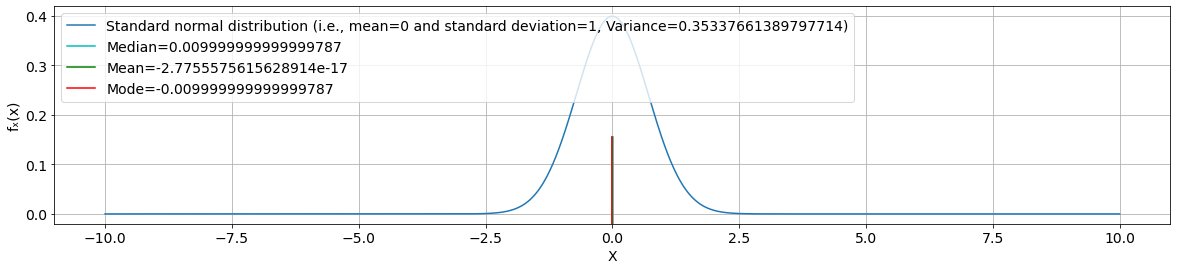

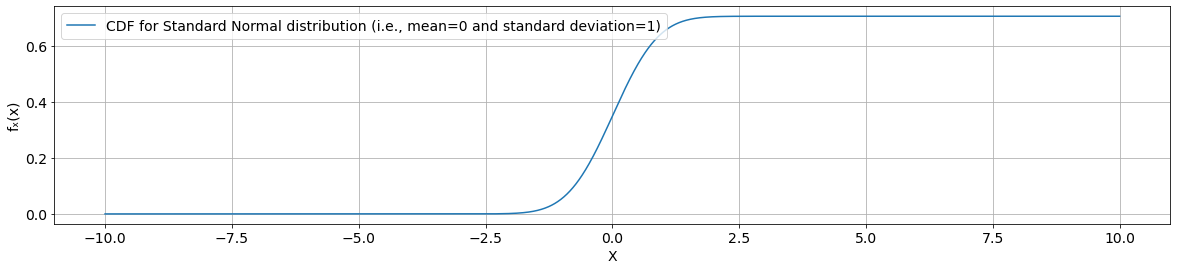

In [293]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

def plot_stdNormal():
  mu=0
  sigma=1
  x=np.linspace(-10,10,2000)
  fx=[]
  for i in x:
    fx.append( (1/(math.sqrt(2*np.pi)*sigma)) * np.exp(-((i-mu)**2)/(sigma**2))   )
  plt.figure(figsize=(20,4))
  plt.rcParams.update({'font.size':14})
  plt.plot(x, fx,label=f'Standard normal distribution (i.e., mean={mu} and standard deviation={sigma}, Variance={f_variance(fx,x)})')
  plt.axvline(x=f_median(fx),ymin=min(fx),ymax=max(fx),color='c',label=f'Median={f_median(fx)}')  
  plt.axvline(x=f_mean(fx,x),ymin=min(fx),ymax=max(fx),color='g',label=f'Mean={f_mean(fx,x)}')  
  plt.axvline(x=f_mode(fx),ymin=min(fx),ymax=max(fx),color='r',label=f'Mode={f_mode(fx)}')
  plt.xlabel('X')
  plt.ylabel(u'f\u2093(x)')
  plt.grid()
  plt.legend(loc='upper left')
  #plt.ylim([0,1])
  plt.show()

print('STANDARD NORMAL DISTRIBUTION:')

plot_stdNormal()

mu=0
sigma=1
x=np.linspace(-10,10,2000)
fx=[]
for i in x:
  fx.append( (1/(math.sqrt(2*np.pi)*sigma)) * np.exp(-((i-mu)**2)/(sigma**2))   )
plt.figure(figsize=(20,4))
plt.rcParams.update({'font.size':14})
plt.plot(x, integ(fx,x), label=f'CDF for Standard Normal distribution (i.e., mean={mu} and standard deviation={sigma})')
plt.xlabel('X')
plt.ylabel(u'f\u2093(x)')
plt.grid()
plt.legend(loc='upper left')
#plt.ylim([0,1])
plt.show()

CHI-SQUARED DISTRIBUTIONS:


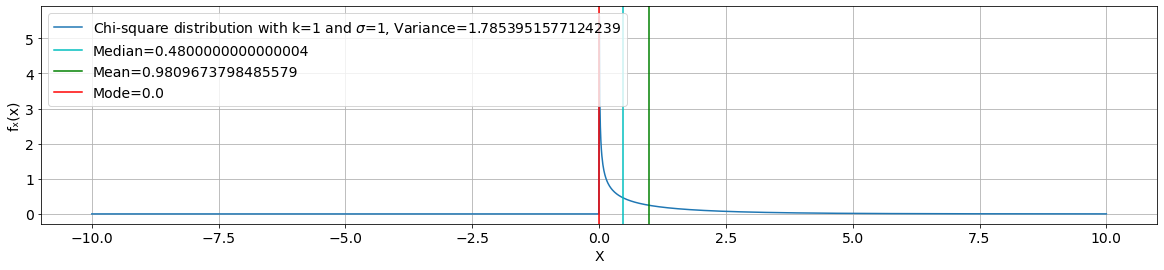

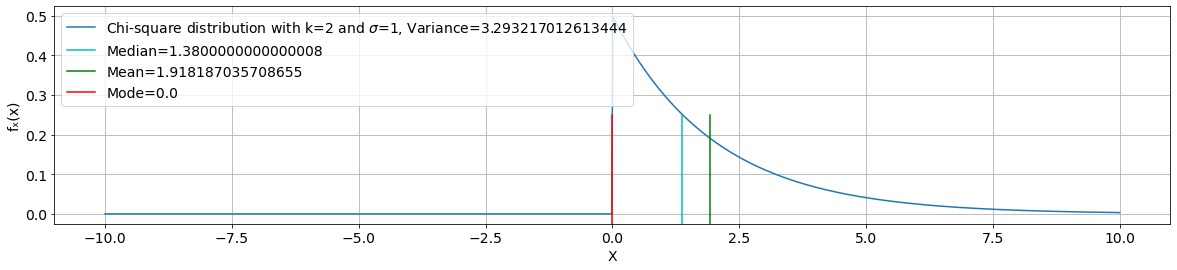

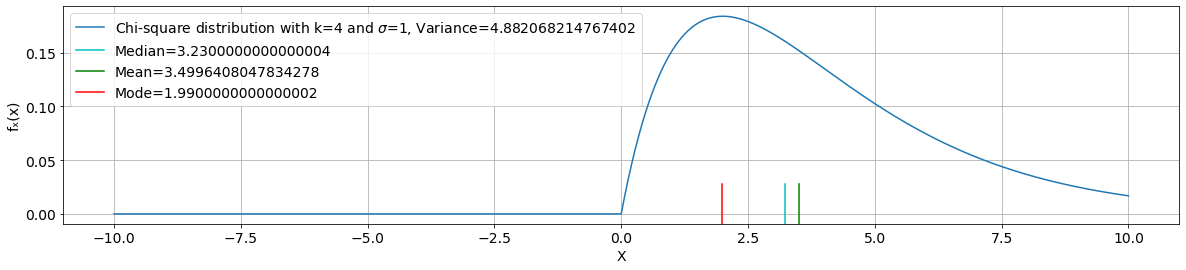

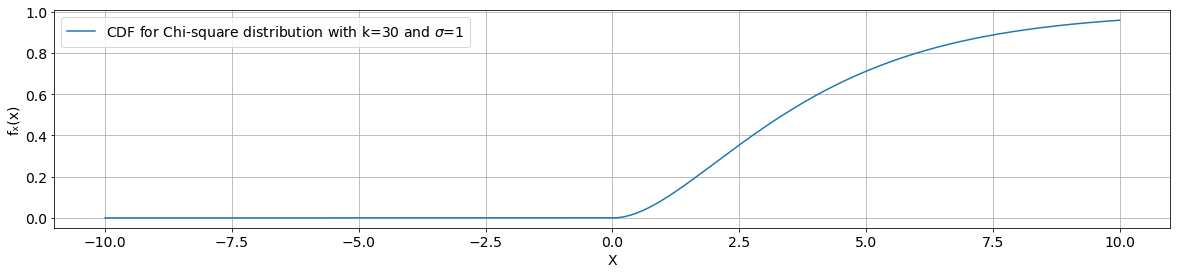

In [292]:
import matplotlib.pyplot as plt
import numpy as np
from math import gamma as gamma

def plot_chisquare(n):
  df=n
  x=np.linspace(-10,10,2000)
  fx=[]
  for i in x:
    if (i<0):
      fx.append(0)
    else:
      fx.append(1 / (2*gamma(df/2)) * (i/2)**(df/2-1) * np.exp(-i/2))
  plt.figure(figsize=(20,4))
  plt.rcParams.update({'font.size':14})
  plt.plot(x, fx,label=f'Chi-square distribution with k={n} and $\sigma$={sigma}, Variance={f_variance(fx,x)}')
  plt.axvline(x=f_median(fx),ymin=min(fx),ymax=max(fx),color='c',label=f'Median={f_median(fx)}')  
  plt.axvline(x=f_mean(fx,x),ymin=min(fx),ymax=max(fx),color='g',label=f'Mean={f_mean(fx,x)}')  
  plt.axvline(x=f_mode(fx),ymin=min(fx),ymax=max(fx),color='r',label=f'Mode={f_mode(fx)}')
  plt.xlabel('X')
  plt.ylabel(u'f\u2093(x)')
  plt.grid()
  plt.legend(loc='upper left')
  #plt.ylim([0,1])
  plt.show()

print('CHI-SQUARED DISTRIBUTIONS:')
plot_chisquare(1)
plot_chisquare(2)
plot_chisquare(4)

df=4
sigma=1
x=np.linspace(-10,10,2000)
fx=[]
for i in x:
  if (i<0):
    fx.append(0)
  else:
    fx.append(1 / (2*gamma(df/2)) * (i/2)**(df/2-1) * np.exp(-i/2))
plt.figure(figsize=(20,4))
plt.rcParams.update({'font.size':14})
plt.plot(x,integ(fx,x),label=f'CDF for Chi-square distribution with k={n} and $\sigma$={sigma}')
plt.xlabel('X')
plt.ylabel(u'f\u2093(x)')
plt.grid()
plt.legend(loc='upper left')
plt.show()

How many of
these distributions are non negative?

**Ans:**  Since these are all valid probability density functions, their f(x) values are always non-negative. However the value of x itself may be allowed to become negative like in Uniform distribution and Gaussian distribution.

---



Consider a signal with 2 orthogonal components X, Y . Each compo-
nent is a random variable that is independent of the other and fol-
lows Gaussian distribution with 0 mean and equal variances σ 2 = 4.
Can you find the distribution of the power content of the signal i.e.
P ower = X 2 + Y 2 . Which distribution is this? Is it a non negative
distribution? Compute the mean median mode and variance and plot
with the PDF.

**Ans** It is a chi-square distribution with degree of freedom = 2 [Ref: https://stats.stackexchange.com/questions/186775/distribution-of-sum-of-squares-of-normals-that-have-mean-zero-but-not-variance-o ].

Although the individual Gaussian random variables can take negative values, this is a non-negative distribution (since we are taking squares ,ie. x^2 + y^2).

CHI-SQUARED DISTRIBUTION (with degree of freedom = 2):


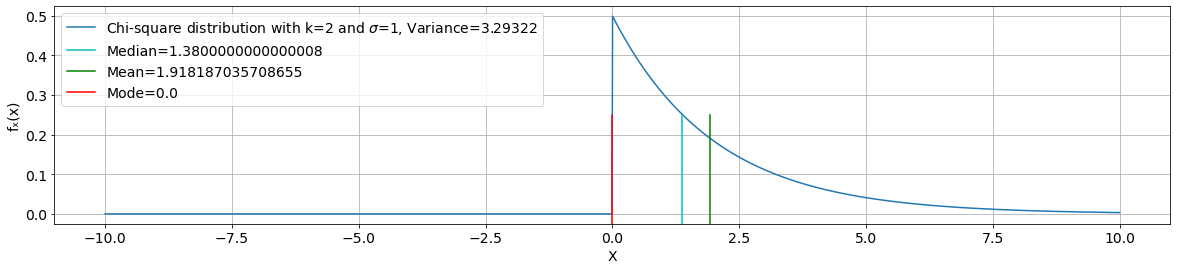

In [291]:
import matplotlib.pyplot as plt
import numpy as np
from math import gamma as gamma

def plot_chisquare(n):
  df=n
  x=np.linspace(-10,10,2000)
  fx=[]
  for i in x:
    if (i<0):
      fx.append(0)
    else:
      fx.append(1 / (2*gamma(df/2)) * (i/2)**(df/2-1) * np.exp(-i/2))
  plt.figure(figsize=(20,4))
  plt.rcParams.update({'font.size':14})
  plt.plot(x, fx,label=f'Chi-square distribution with k={n} and $\sigma$={sigma}, Variance={round(f_variance(fx,x),5)}')

  plt.axvline(x=f_median(fx),ymin=min(fx),ymax=max(fx),color='c',label=f'Median={f_median(fx)}')  
  plt.axvline(x=f_mean(fx,x),ymin=min(fx),ymax=max(fx),color='g',label=f'Mean={f_mean(fx,x)}')  
  plt.axvline(x=f_mode(fx),ymin=min(fx),ymax=max(fx),color='r',label=f'Mode={f_mode(fx)}')

  plt.xlabel('X')
  plt.ylabel(u'f\u2093(x)')
  plt.grid()
  plt.legend(loc='upper left')
  #plt.ylim([0,1])
  plt.show()

print('CHI-SQUARED DISTRIBUTION (with degree of freedom = 2):')
plot_chisquare(2)


**• Discrete distributions**
To plot the discreet distributions use the impulse sequence or impulse
train. Write the PMF in terms of linear combination of impulses and
then plot. You can write a function to generate a impulse train first.
PMF’s are of form P (X = x) =
0.2, 0.1, 0.5, ...] therefore PMF can
P [0,
∞
also be expressed as P (X) = k=−∞ P (x k )δ[x − x k ]



Consider a transmitter that can transmit messages only in the form
of 2 bits 0 and 1. The receiver receives a single message sent by the
transmitter say X. Since, we do not know before hand which bit
was sent X follows a certain distribution. Which distribution is this?
Find the PMF and plot it. Also calculate the mean and variance of
X. Assume probability for receiving 0(failure) is p = 0.1, 0.5, 0.8.

**Ans:** It follows Bernoulli's distribution.

In [266]:
def fd_mean(fx,x):
  mn=0
  for i in range(len(fx)):
    mn=mn+(fx[i]*x[i])
  return mn

def fd_variance(fx,x):
  var=0
  mu=fd_mean(fx,x)
  for i in range(len(fx)):
    var=var+((x[i]-mu)**2 * fx[i])
  return var


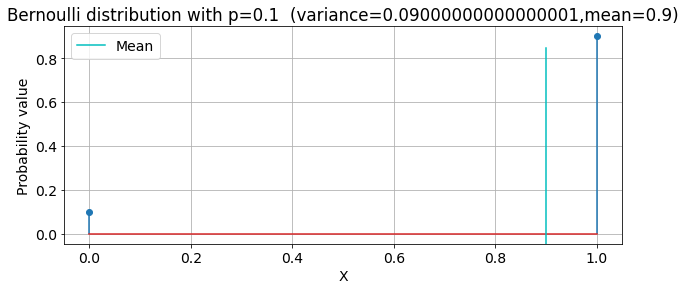

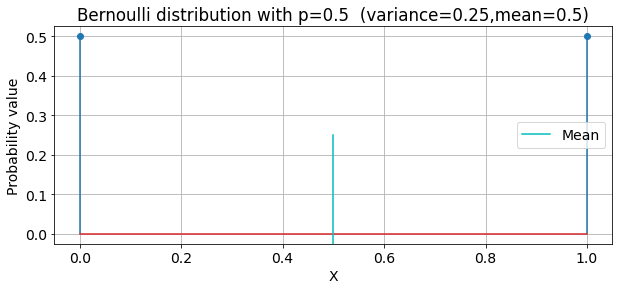

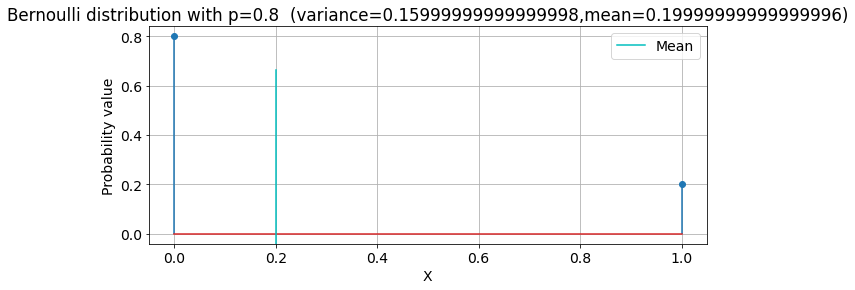

In [273]:
p_list=[0.1,0.5,0.8]
for p0 in p_list:
  p1=1-p0
  x=[0,1]
  fx=[p0,p1]
  variance=fd_variance(fx,x)
  plt.figure(figsize=(10,4))
  plt.stem(x,fx,use_line_collection=True)
  plt.axvline(x=fd_mean(fx,x),ymin=0,ymax=max(fx),color='c',label='Mean')  
  plt.xlabel('X')
  plt.ylabel('Probability value')
  plt.title(f'Bernoulli distribution with p={p0}  (variance={variance},mean={fd_mean(fx,x)})')
  plt.legend()
  plt.grid()
  plt.show()

Consider the same transmitter but this time the receiver receives 20
bits. Each bit is independent of the previous one. The probability of
receiving a 0 is p = 0.4. Let X be the number of 1s (successes) that
is received at the receiver’s end. What is the distribution followed
by X. How is it related to the first distribution? Calculate the mean
and variance and plot the PMF.

**Ans** It is a Binomial distribution. The Bernoulli distribution represents the success or failure of a single
Bernoulli trial. The Binomial Distribution represents the number of
successes and failures in n independent Bernoulli trials for some given value
of n.

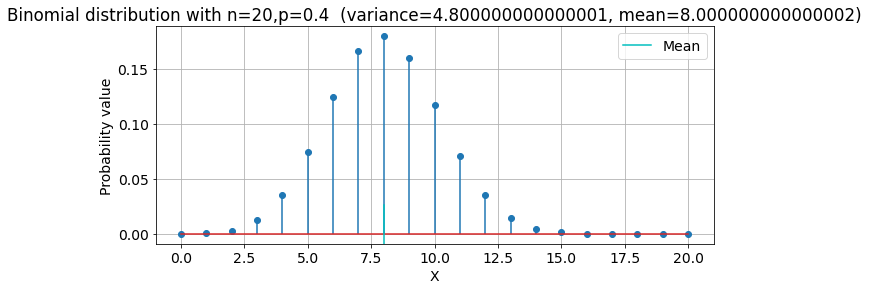

In [274]:
def nCr(n, r): 
  
  return (fact(n) / (fact(r)  * fact(n - r))) 
  
# Returns factorial of n 
def fact(n): 
    res = 1
    for i in range(2, n+1): 
        res = res * i 
    return res 
 
n=20
p0=p=0.4
p1=1-p0
x=np.arange(0,n+1,1)
fx=[]
for k in range(n+1):
  fx.append(nCr(n,k) * p**k * (1-p)**(n-k))
variance=fd_variance(fx,x)
plt.figure(figsize=(10,4))
plt.stem(x,fx,use_line_collection=True)
plt.axvline(x=fd_mean(fx,x),ymin=0,ymax=max(fx),color='c',label='Mean')  
plt.xlabel('X')
plt.ylabel('Probability value')
plt.title(f'Binomial distribution with n={n},p={p0}  (variance={variance}, mean={fd_mean(fx,x)})')
plt.legend()
plt.grid()
plt.show()

Consider an experiment in which bits are transmitted sequentially.
Each bit is independent of the other. When the first bit arrives the
receiver checks for a 1. If it is 1 the receiver takes a decision. If
it is a 0 the receiver waits for the next bit. This goes on till the
receiver finds out that the bit was 1 and the experiment is dropped
once the bit is 0. Let X denote that the bit received was 1 on the
k th time (example, X=2 suggests that the bit sequence was 0, 1 and
once 1 was received the experiment was stopped). Find the PMF
of X. What is this distribution known as? Calculate the mean and
variance and plot the PMF. How is this distribution related to the
first distribution.

**Ans** It is Geometric distribution. Similar to the binomial distribution, the geometric distribution is also for repeated Bernoulli trials, but the difference is that it gives the probability that the first
k − 1 trials are failures, while the kth trial is the first success.

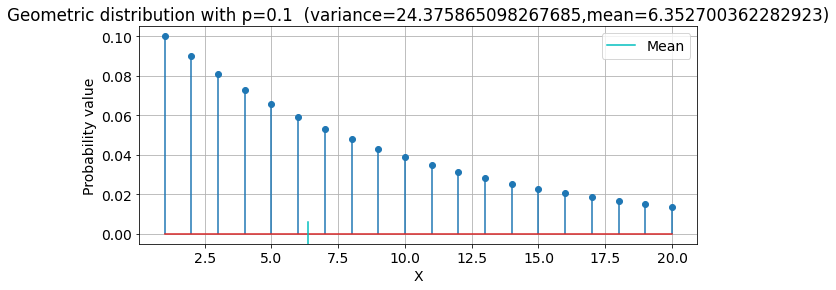

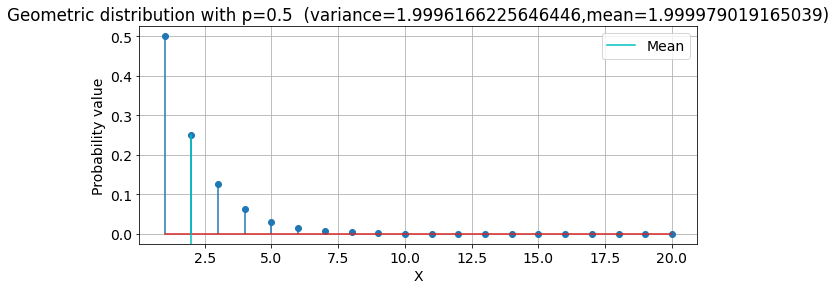

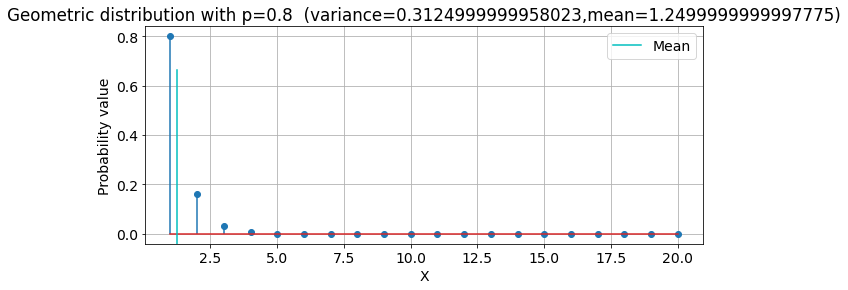

In [277]:
p_list=[0.1,0.5,0.8]
for p0 in p_list:
  p1=1-p0
  n=20
  x=np.arange(1,n+1,1)
  fx=[]
  for k in range(1,n+1):
    fx.append(p0*(1-p0)**(k-1))
  variance=fd_variance(fx,x)
  plt.figure(figsize=(10,4))
  plt.stem(x,fx,use_line_collection=True)
  plt.axvline(x=fd_mean(fx,x),ymin=0,ymax=max(fx),color='c',label='Mean')  
  plt.xlabel('X')
  plt.ylabel('Probability value')
  plt.title(f'Geometric distribution with p={p0}  (variance={variance},mean={fd_mean(fx,x)})')
  plt.legend()
  plt.grid()
  plt.show()

Consider an experiment in which the receiver receives different bits
randomly from many transmitters within a second’s interval. Each
second it was observed that each second (at any interval) the mean
number of bits that were received was 5. Let X be the number of bits
received every second (during an interval). What is the distribution
that is followed by X. Is there any relation between this and the
second distribution that we discussed? Calculate the mean, variance
and plot the PMF.

**Ans:** It follow Poisson distribution.Binomial distribution describes the distribution of binary data from a finite sample. Thus it gives the probability of getting r events out of n trials. Poisson distribution describes the distribution of binary data from an infinite sample. Thus it gives the probability of getting r events in a population.

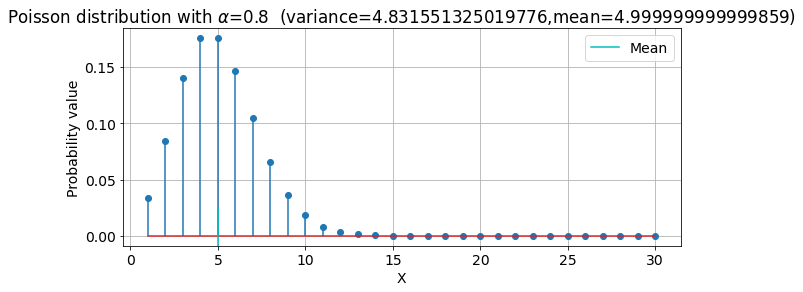

In [280]:
a=5 # bits/second
n=30
x=np.arange(1,n+1,1)
fx=[]
for k in range(1,n+1):
  fx.append( (a**k * np.exp(-a))/fact(k) )
variance=fd_variance(fx,x)
plt.figure(figsize=(10,4))
plt.stem(x,fx,use_line_collection=True)
plt.axvline(x=fd_mean(fx,x),ymin=0,ymax=max(fx),color='c',label='Mean')  
plt.xlabel('X')
plt.ylabel('Probability value')
plt.title(fr'Poisson distribution with $\alpha$={p0}  (variance={variance},mean={fd_mean(fx,x)})')
plt.legend()
plt.grid()
plt.show()

**2. Signal measures**
Plot the following sequences: x 1 [n] = [1, 2, 3, 2, 1, 2, 3, 4, 3, 2, 1] x 2 [n] =
[1, 2, 1, 2, 1, 2, 1, 2] x 3 [n] = [1, 2, 3, 2, 4, 6, 4, 8, 12] x 4 [n] = [2, 4, 2, 4, 2, 4, 2, 4]
x 5 [n] = [1, −2, 3, −2, 1, −2, 3, −4, 3, −2, 1] and x 6 [n] = 2 × x 1 [n] + 1.


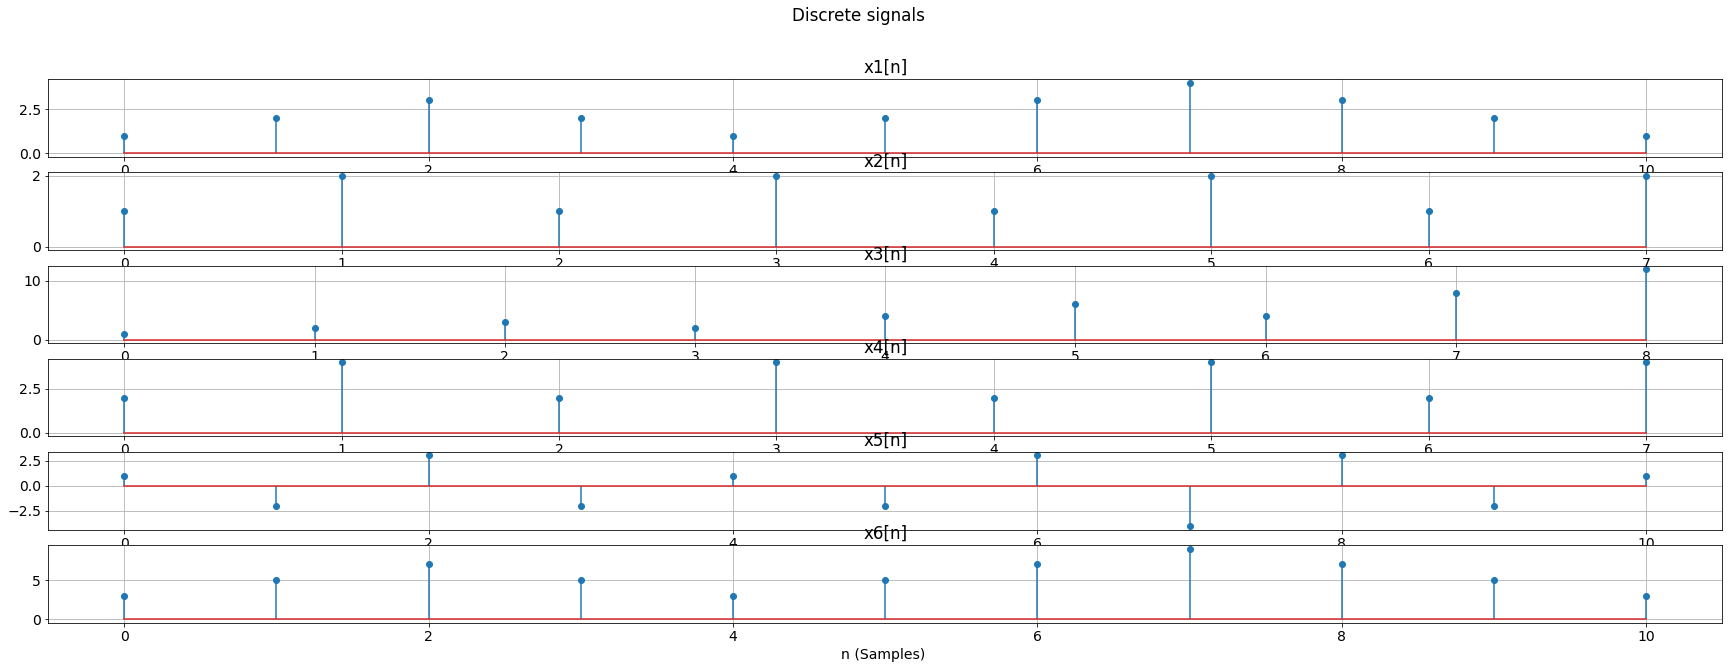

In [281]:
import numpy as np
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt

x1=[1, 2, 3, 2, 1, 2, 3, 4, 3, 2, 1]
x2= [1, 2, 1, 2, 1, 2, 1, 2] 
x3=[1, 2, 3, 2, 4, 6, 4, 8, 12] 
x4= [2, 4, 2, 4, 2, 4, 2, 4] 
x5= [1, -2, 3, -2, 1, -2, 3, -4, 3, -2, 1] 
x6=[]
for i in range(len(x1)):
  x6.append(2*x1[i] + 1)

x=[x1,x2,x3,x4,x5,x6]
fig,ax=plt.subplots(6,1,figsize=(30,10))

for i,xi in enumerate(x):
  ax[i].xaxis.set_major_locator(MaxNLocator(integer=True))
  ax[i].stem(np.arange(0,len(x[i]),1), x[i], use_line_collection=True)
  ax[i].set_title(f'x{i+1}[n]')
  ax[i].set_xlabel('n (Samples) ')
  ax[i].grid()

plt.suptitle('Discrete signals')
plt.show()

Cal-
culate the autocorrelation function for a delay of 2 samples.

In [209]:
def correlation(x, h):    #returns the correlation array calculated using convolution ,i.e., Rxy[k]=x[k]*y[-k]
  x = list(x)
  h = list(h)         #converting to lists
  if(len(x)<len(h)):  #taking the smaller of the two in h
    x,h=h,x

  n=len(x)
  m=len(h)            #finding the lengths of the two lists
  L= n+2*(m-1)
  x=[0]*(m-1)+x+[0]*(m-1)
  #h.reverse()         #reversing the 'h' list
  hRev=h+[0]*(n+m-2)  #converting each list to length = n+2(m-1) 

  leftLim=0
  rightLim=n+m-2    # length of output is n+m-1: [0 , n+m-2]
  y=[0]*(n+m-1)
  for i in range(leftLim,rightLim+1):   #filling up the output list one by one
    for j in range(L):                  #iterating over the input list and impulse_response list 
      y[i]=y[i]+(x[j]*hRev[j])
    hRev.pop()                          # hRev shifted rightwards by one after calculating each y[i]
    hRev=[0]+hRev
  orig=y.copy()
  for i in range(len(y)):
    y[i]=y[i]/len(y)        #finding the expecation E[x(n)y(n+M)]

  s1=x
  s2=h
  #finding variance of x
  s1=np.array(s1)
  sum=0
  for i in range(len(s1)):
    sum=sum+s1[i]
  mu1=sum/len(s1)
  # mu1=np.mean(s1)
  var1=0
  for i in range(n):
    var1=var1+(s1[i]-mu1)**2
  var1=var1/(n-1)         #(summation of (x-u)^2 for all) / (n-1)

  #finding variance of y
  s2=np.array(s2)
  sum=0
  for i in range(len(s2)):
    sum=sum+s2[i]
  mu2=sum/len(s2)
  #mu2=np.mean(s2)
  var2=0
  for i in range(m):
    var2=var2+(s1[i]-mu2)**2
  var2=var2/(m-1)         #(summation of (y-u)^2 for all) / (n-1)

  for i in range(len(y)):
    y[i]=y[i]/(math.sqrt(var1)*math.sqrt(var2)) 

  return orig,y


## Signature for autocorrelation.py
def autocorrelation(s1, s2, delay):
  #sequence1, sequence2 = np.array()
  # Formula for ACF
  # Plot the ACF also with the particular delay
  if s1!=s2:
    print('The two signals are different. Autocorrelation cannot be computed.')
  n=len(s1)
  _,corr=correlation(s1,s2)
  '''
  corr_len=len(corr)
  exp=corr[int(corr_len/2)+delay]/n       # E[ x(n)x(n+M) ]

  #finding variance of x
  s1=np.array(s1)
  mu=np.mean(s1)
  var=0
  for i in range(n):
    var=var+(s1[i]-mu)**2
  var=var/(n-1)         #(summation of (x-u)^2 for all) / (n-1)
'''
  return corr[int(corr_len/2)+delay]

In [210]:
delay=2
for i,xi in enumerate(x):
  print(f'Autocorrelation of x{i+1}[n] with a delay of 2 samples: ', end=' ')
  #print(correlation(xi,xi,delay),end='')
  #print(np.correlate(xi,xi,mode='full'))
  #corr=correlation(xi,xi)
  #corr_len=len(corr)
  print(autocorrelation(xi,xi,delay))


Autocorrelation of x1[n] with a delay of 2 samples:  1.2451055948672778
Autocorrelation of x2[n] with a delay of 2 samples:  0.4626481614571046
Autocorrelation of x3[n] with a delay of 2 samples:  0.6583836031641095
Autocorrelation of x4[n] with a delay of 2 samples:  0.4626481614571046
Autocorrelation of x5[n] with a delay of 2 samples:  21.428571428571427
Autocorrelation of x6[n] with a delay of 2 samples:  1.2408610063679748


Plot the
autocorrelation function and find the power of all the sequences.

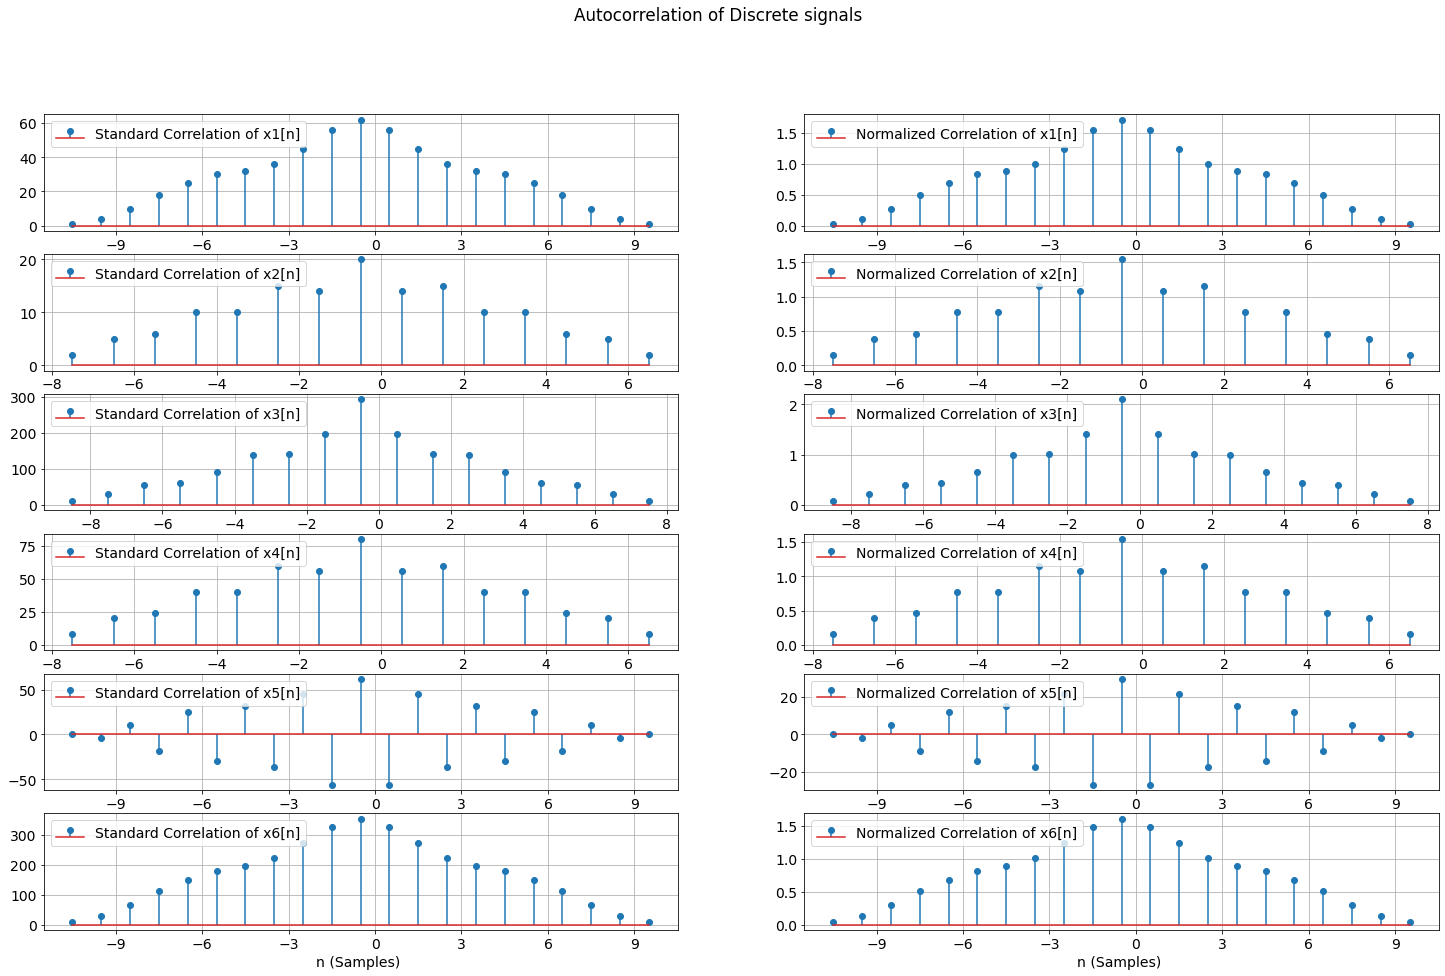

In [211]:
fig,ax=plt.subplots(6,2,figsize=(25,15))
for i,xi in enumerate(x):
  orig_corr,norm_corr=correlation(xi,xi)
  n=len(orig_corr)/2
  k=np.arange(-n,n,1)

  #ax[i].stem(np.arange(0,len(x[i]),1), x[i], )
  #ax[i].set_title(f'Autocorrelation of x{i+1}[n]')
  ax[i][0].stem(k,orig_corr,label=f'Standard Correlation of x{i+1}[n]',use_line_collection=True)
  ax[i][0].xaxis.set_major_locator(MaxNLocator(integer=True))
  ax[i][0].set_xlabel('n (Samples) ')
  ax[i][0].legend(loc='upper left')
  ax[i][0].grid()

  ax[i][1].stem(k,norm_corr,label=f'Normalized Correlation of x{i+1}[n]',use_line_collection=True)
  ax[i][1].xaxis.set_major_locator(MaxNLocator(integer=True))
  ax[i][1].set_xlabel('n (Samples) ')
  ax[i][1].grid()
  ax[i][1].legend(loc='upper left')

plt.suptitle('Autocorrelation of Discrete signals')
plt.show()


In [284]:
for i,xi in enumerate(x):
  orig_corr,norm_corr=correlation(xi,xi)
  print(f'Power of x{i+1}[n] having actual energy {orig_corr[int(len(orig_corr)/2)]} is {norm_corr[int(len(norm_corr)/2)]} (Normalized power)')

Power of x1[n] having actual energy 62 is 1.7154788195949162 (Normalized power)
Power of x2[n] having actual energy 20 is 1.5421605381903483 (Normalized power)
Power of x3[n] having actual energy 294 is 2.1039649927200887 (Normalized power)
Power of x4[n] having actual energy 80 is 1.5421605381903483 (Normalized power)
Power of x5[n] having actual energy 62 is 29.523809523809526 (Normalized power)
Power of x6[n] having actual energy 355 is 1.6135738361195275 (Normalized power)


Also
find the cross correlation function for all the pairs for a delay of 2 sam-
ples.

In [213]:

## Signature for autocorrelation.py
def crosscorrelation(s1, s2, delay):
  #sequence1, sequence2 = np.array()
  # Formula for ACF
  # Plot the ACF also with the particular delay

  _,corr=correlation(s1,s2)

  return corr[int(corr_len/2)+delay]

In [214]:
start=time.time()
x1=[1, 2, 3, 2, 1, 2, 3, 4, 3, 2, 1]
x2= [1, 2, 1, 2, 1, 2, 1, 2] 
x3=[1, 2, 3, 2, 4, 6, 4, 8, 12] 
x4= [2, 4, 2, 4, 2, 4, 2, 4] 
x5= [1, -2, 3, -2, 1, -2, 3, -4, 3, -2, 1] 
x6=[]
for i in range(len(x1)):
  x6.append(2*x1[i] + 1)

x=[x1,x2,x3,x4,x5,x6]

delay=2
for i in range(6):
  for j in range(i,6):
    if i!=j:
      xi=x[i]
      xj=x[j]
      crosscorr=crosscorrelation(xi,xj,delay)
      print(f'Normalized crosscorrelation of x{i+1}[n] and x{j+1}[n] = {crosscorr}')


Normalized crosscorrelation of x1[n] and x2[n] = 0.7151786813117186
Normalized crosscorrelation of x1[n] and x3[n] = 0.49548539514953965
Normalized crosscorrelation of x1[n] and x4[n] = 0.6989838568906218
Normalized crosscorrelation of x1[n] and x5[n] = -0.5810492776047296
Normalized crosscorrelation of x1[n] and x6[n] = 1.2275480283887779
Normalized crosscorrelation of x2[n] and x3[n] = 1.096656991485697
Normalized crosscorrelation of x2[n] and x4[n] = 0.45217175054144515
Normalized crosscorrelation of x2[n] and x5[n] = 0.16433554953054488
Normalized crosscorrelation of x2[n] and x6[n] = 0.6710810528050378
Normalized crosscorrelation of x3[n] and x4[n] = 1.0718238023941193
Normalized crosscorrelation of x3[n] and x5[n] = 0.018368081609793203
Normalized crosscorrelation of x3[n] and x6[n] = 0.5160707046078369
Normalized crosscorrelation of x4[n] and x5[n] = 0.16061426219307792
Normalized crosscorrelation of x4[n] and x6[n] = 0.7174158223862868
Normalized crosscorrelation of x5[n] and x

In [217]:
import time

start=time.time()
x1=[1, 2, 3, 2, 1, 2, 3, 4, 3, 2, 1]
x2= [1, 2, 1, 2, 1, 2, 1, 2] 
x3=[1, 2, 3, 2, 4, 6, 4, 8, 12] 
x4= [2, 4, 2, 4, 2, 4, 2, 4] 
x5= [1, -2, 3, -2, 1, -2, 3, -4, 3, -2, 1] 
x6=[]
for i in range(len(x1)):
  x6.append(2*x1[i] + 1)

x=[x1,x2,x3,x4,x5,x6]

delay=2
for i in range(6):
  for j in range(i,6):
    if i!=j:
      xi=x[i]
      xj=x[j]
      crosscorr,_=correlation(xi,xj)
      #crosscorr=crosscorr[int(len(crosscorr)/2) + delay]
      print(f'Actual crosscorrelation of x{i+1}[n] and x{j+1}[n] = {crosscorr}')

end=time.time()
print()
print(f'Time elapsed for self-written code = {(end-start)*1000} ms')

Actual crosscorrelation of x1[n] and x2[n] = [2, 5, 10, 12, 14, 17, 22, 28, 30, 30, 26, 24, 22, 19, 14, 8, 4, 1]
Actual crosscorrelation of x1[n] and x3[n] = [12, 32, 56, 62, 56, 68, 87, 108, 114, 106, 90, 66, 50, 40, 28, 18, 10, 4, 1]
Actual crosscorrelation of x1[n] and x4[n] = [4, 10, 20, 24, 28, 34, 44, 56, 60, 60, 52, 48, 44, 38, 28, 16, 8, 2]
Actual crosscorrelation of x1[n] and x5[n] = [1, 0, 2, -2, 1, -2, 0, 0, -3, 0, -2, 0, -3, 0, 0, 2, 1, 2, 2, 0, 1]
Actual crosscorrelation of x1[n] and x6[n] = [3, 11, 26, 44, 59, 71, 78, 90, 111, 135, 148, 135, 111, 90, 80, 75, 63, 46, 26, 11, 3]
Actual crosscorrelation of x2[n] and x3[n] = [2, 5, 10, 12, 20, 28, 34, 48, 64, 55, 56, 48, 46, 32, 32, 12]
Actual crosscorrelation of x2[n] and x4[n] = [4, 10, 12, 20, 20, 30, 28, 40, 28, 30, 20, 20, 12, 10, 4]
Actual crosscorrelation of x2[n] and x5[n] = [2, -3, 6, -4, 6, -7, 10, -12, 10, -10, 6, -8, 6, -5, 2, 0, 0, 1]
Actual crosscorrelation of x2[n] and x6[n] = [6, 13, 25, 30, 36, 43, 55, 68, 72

In [218]:
import time

start=time.time()
x1=[1, 2, 3, 2, 1, 2, 3, 4, 3, 2, 1]
x2= [1, 2, 1, 2, 1, 2, 1, 2] 
x3=[1, 2, 3, 2, 4, 6, 4, 8, 12] 
x4= [2, 4, 2, 4, 2, 4, 2, 4] 
x5= [1, -2, 3, -2, 1, -2, 3, -4, 3, -2, 1] 
x6=[]
for i in range(len(x1)):
  x6.append(2*x1[i] + 1)

x=[x1,x2,x3,x4,x5,x6]

delay=2
for i in range(6):
  for j in range(i,6):
    if i!=j:
      xi=x[i]
      xj=x[j]
      crosscorr=np.correlate(xi,xj,mode='full')
      print(f'Actual crosscorrelation of x{i+1}[n] and x{j+1}[n]={crosscorr}')

end=time.time()
print()
print(f'Time elapsed for numpy library code = {(end-start)*1000} ms')

Actual crosscorrelation of x1[n] and x2[n]=[ 2  5 10 12 14 17 22 28 30 30 26 24 22 19 14  8  4  1]
Actual crosscorrelation of x1[n] and x3[n]=[ 12  32  56  62  56  68  87 108 114 106  90  66  50  40  28  18  10   4
   1]
Actual crosscorrelation of x1[n] and x4[n]=[ 4 10 20 24 28 34 44 56 60 60 52 48 44 38 28 16  8  2]
Actual crosscorrelation of x1[n] and x5[n]=[ 1  0  2 -2  1 -2  0  0 -3  0 -2  0 -3  0  0  2  1  2  2  0  1]
Actual crosscorrelation of x1[n] and x6[n]=[  3  11  26  44  59  71  78  90 111 135 148 135 111  90  80  75  63  46
  26  11   3]
Actual crosscorrelation of x2[n] and x3[n]=[12 32 32 46 48 56 55 64 48 34 28 20 12 10  5  2]
Actual crosscorrelation of x2[n] and x4[n]=[ 4 10 12 20 20 30 28 40 28 30 20 20 12 10  4]
Actual crosscorrelation of x2[n] and x5[n]=[  1   0   0   2  -5   6  -8   6 -10  10 -12  10  -7   6  -4   6  -3   2]
Actual crosscorrelation of x2[n] and x6[n]=[ 3 11 20 34 45 53 58 64 72 72 68 55 43 36 30 25 13  6]
Actual crosscorrelation of x3[n] and x4[n]=

**The time of execution are very close. They vary on different runs and there is almost no fixed order between them. My code was faster in this particular run. Maybe using a list is what makes it fast enough.**

**3. Noise**
Generate an uncorrelated uniform random noise sequence, an uncorrelated
white noise sequence, and a red noise sequence. Why are they called so?
What are their distributions?

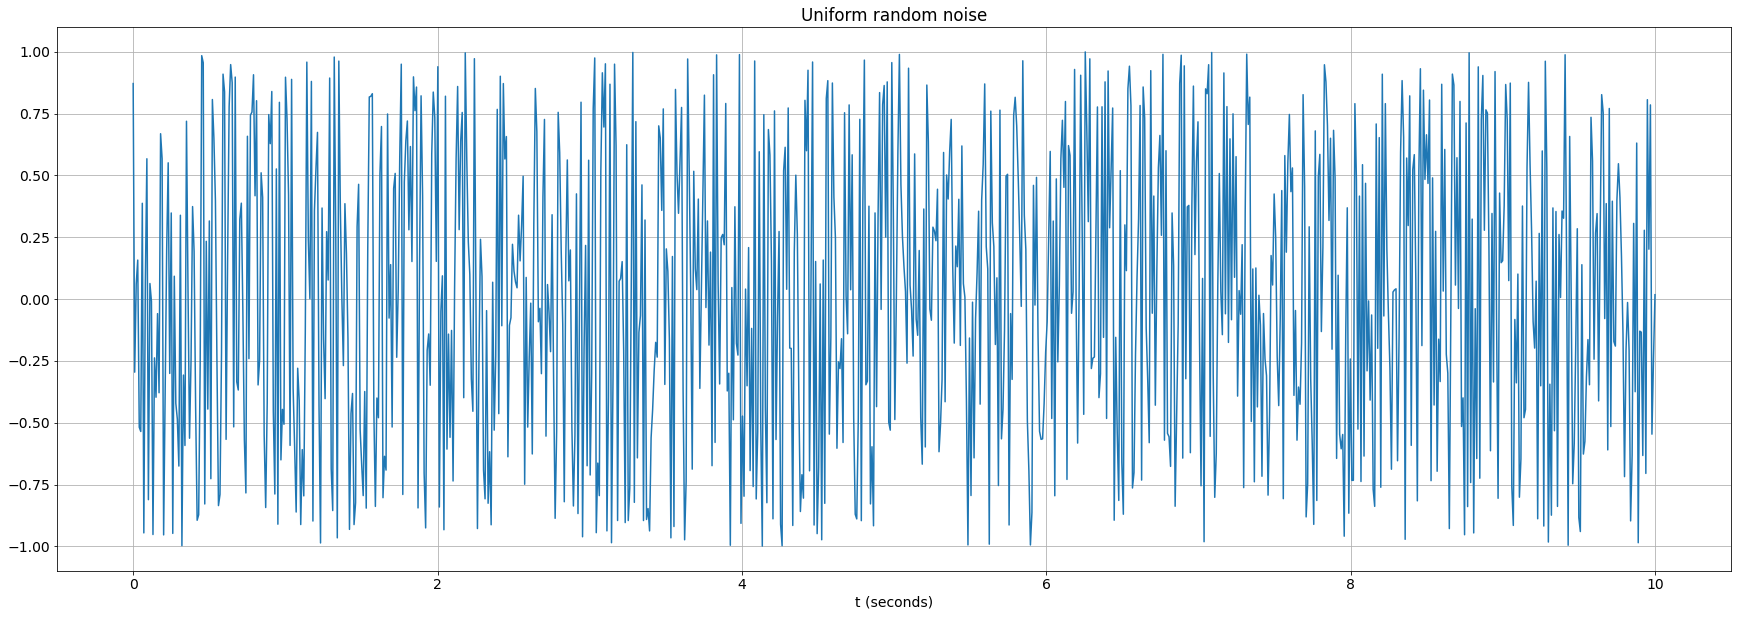

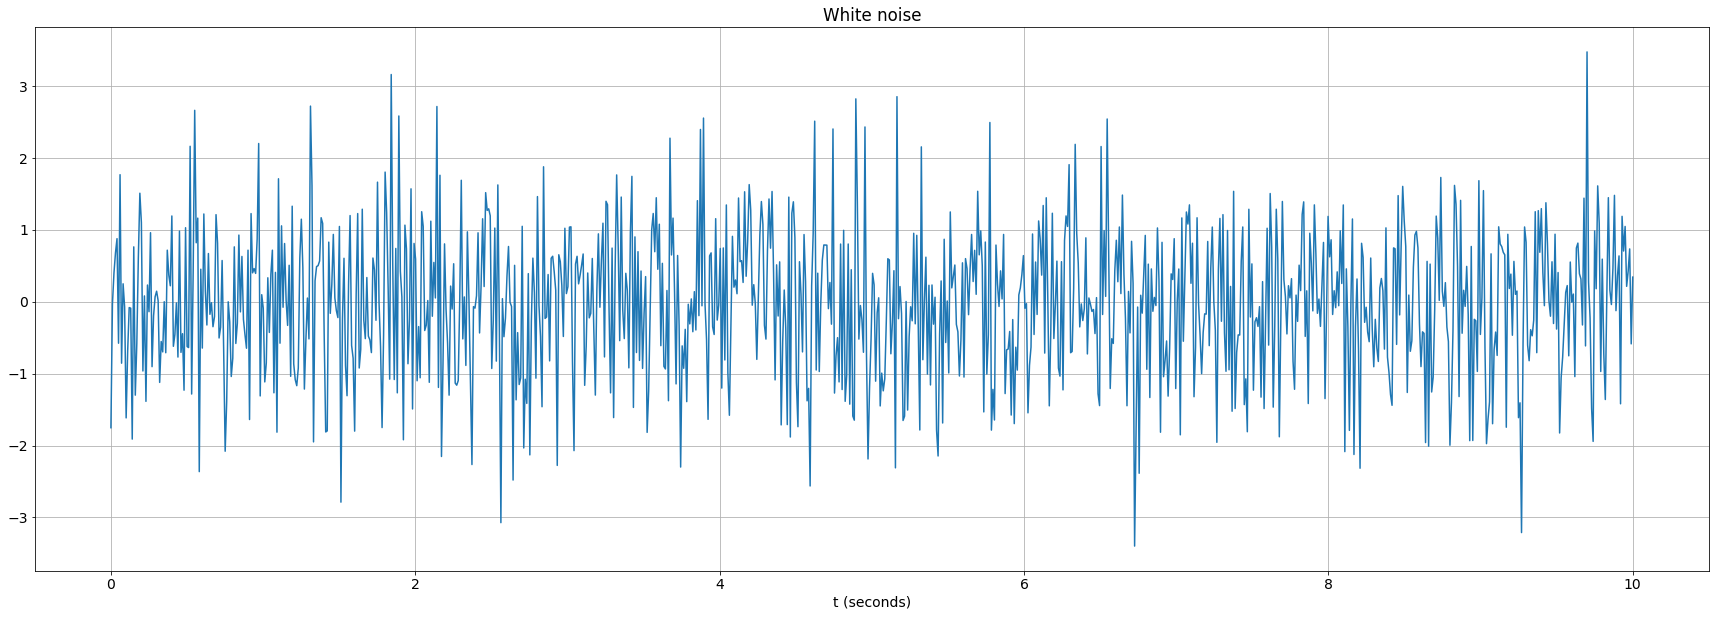

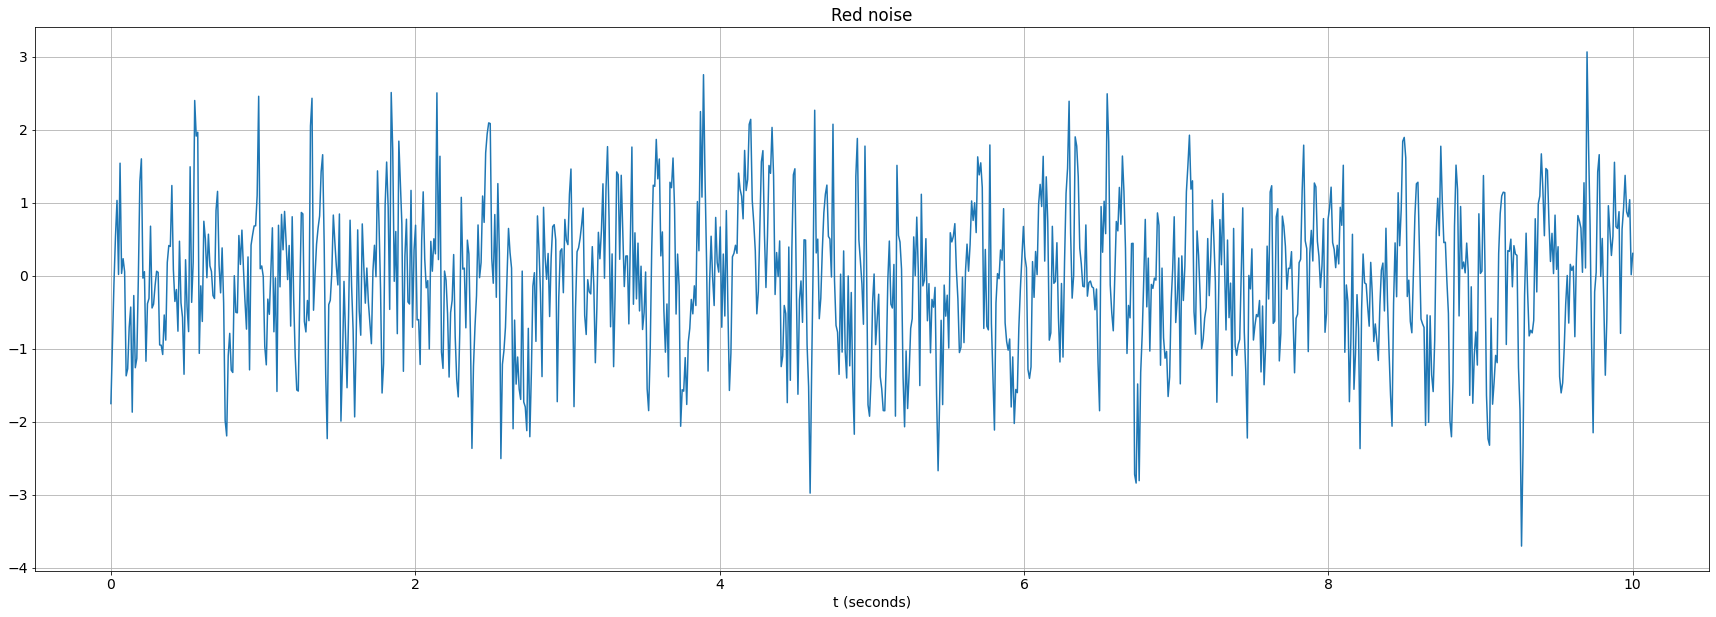

In [238]:
import numpy
import matplotlib.pyplot as plt
import math

#  WHITE NOISE
low=-1
high=1
num_samples = 1000
unif = numpy.random.uniform(low,high, size=num_samples)
t=np.linspace(0,10,num_samples)

plt.figure(figsize=(30,10))
plt.plot(t,unif)
plt.title('Uniform random noise')
plt.xlabel('t (seconds)')
plt.grid()
plt.show()


#  WHITE NOISE
mean = 0
std = 1 
num_samples = 1000
white = numpy.random.normal(mean, std, size=num_samples)
t=np.linspace(0,10,num_samples)

plt.figure(figsize=(30,10))
plt.plot(t,white)
plt.title('White noise')
plt.xlabel('t (seconds)')
plt.grid()
plt.show()

# RED NOISE   #reference: https://atmos.washington.edu/~breth/classes/AM582/lect/lect8-notes.pdf
red=[]
r=0.5
red.append(white[0])
for i in range(1,num_samples):
  red_next=r*red[i-1] + math.sqrt(1-r**2)*white[i]
  red.append(red_next)


plt.figure(figsize=(30,10))
plt.plot(t,red)
plt.title('Red noise')
plt.xlabel('t (seconds)')
plt.grid()
plt.show()

1. Uniform random noise is generated from a uniform distribution. Hence the name. 

2. White noise has zero mean, constant variance, and is uncorrelated in time.
Here it has been generated using a Standard normal distribution. Since it contains signals of every possible frequency, it is analogous to white light which contains light waves of every visible frequency. Hence the name.

3. Red noise has zero mean, constant variance, but is serially correlated in time. It has been generating from the  corresponding samples of the white noise and the previous samples of the red noise. Red noise is strong in longer wavelengths, similar to the red end of the visible spectrum. Hence the name.

Generate a random sinusoid x[n] = A cos(ω 0 n + φ) where A is uniformly
distributed random variable in [0,4] and φ is uniformly distributed random
variable in [0, 2π].

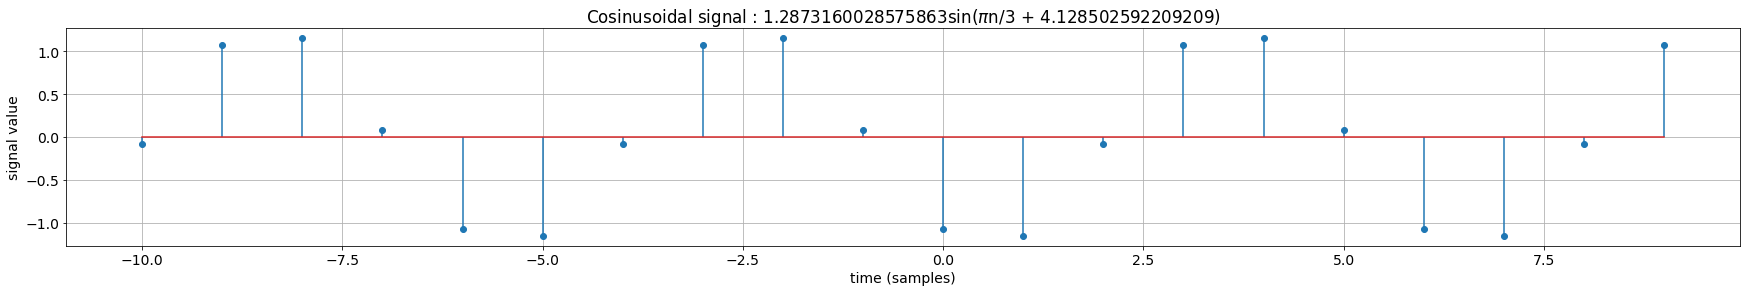

In [237]:
A = numpy.random.uniform(0,4)
phi = numpy.random.uniform(0,2*np.pi)
w=1/3*np.pi
n=np.arange(-10,10,1)
sine=A*np.sin(w*n + phi)

plt.figure(figsize=(30,4))
plt.stem(n,sine,use_line_collection=True)
plt.xlabel('time (samples)')
plt.ylabel('signal value')
plt.title(f'Cosinusoidal signal : {A}sin($\pi$n/3 + {phi})')
plt.grid()
plt.show()

Generate a noisy sinusoid with amplitude 5 and frequence ω = 2π. Use
the gaussian noise of mean 0 and variance 1 to be used as an envelope
(Envelope is a signal which decides the outer structure whereas sinusoid
will be embedded in some way to the gaussian noise).

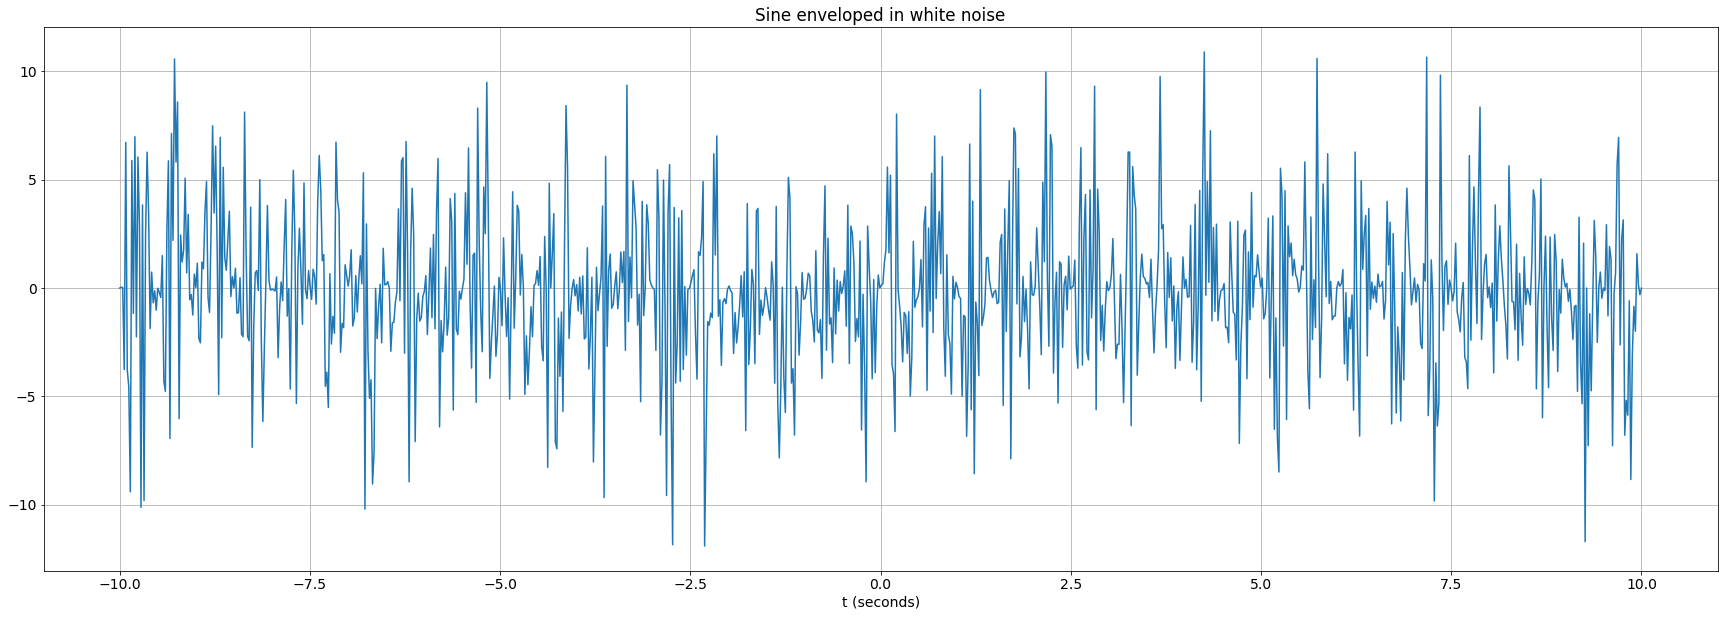

In [285]:
t=np.linspace(-10,10,1000)

#   SINUSOID
sine=5*np.sin(2*np.pi*t)

#  GAUSSIAN NOISE
mean = 0
std = 1 
num_samples = 1000
white = numpy.random.normal(mean, std, size=num_samples)
env_sine=white*sine

plt.figure(figsize=(30,10))
plt.plot(t,env_sine)
plt.title('Sine enveloped in white noise')
plt.xlabel('t (seconds)')
plt.grid()
plt.show()

Bonus(Ungraded): Try visualizing the effects of noise addition to im-
ages and a recorded wavfile. Use the speckle, salt and pepper, gaussian
noises in images and just gaussian noise in wavfile. Is there any way to
remove this noise? Also visualize any waveforms before and after adding
noise to it and how it behaves.

Original image:


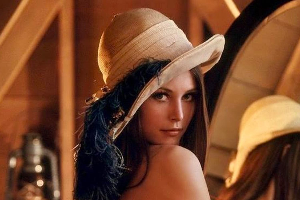


After adding Gaussian noise:


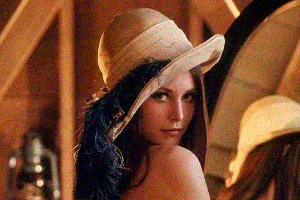


After adding salt and pepper noise:


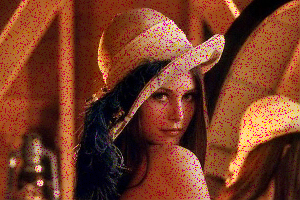


After adding Speckle noise:


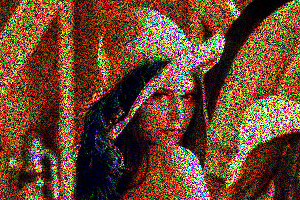

In [310]:
'''
Parameters
----------
image : ndarray
    Input image data. Will be converted to float.
mode : str
    One of the following strings, selecting the type of noise to add:

    'gauss'     Gaussian-distributed additive noise.
    's&p'       Replaces random pixels with 0 or 1.
    'speckle'   Multiplicative noise using out = image + n*image,where
                n is uniform noise with specified mean & variance.
'''

import numpy as np
import os
import cv2
from google.colab.patches import cv2_imshow

def noisy(noise_typ,image):

   if noise_typ == "gauss":
      row,col,ch= image.shape
      mean = 0
      var = 100
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = image + gauss
      return noisy

   elif noise_typ == "s&p":
      row,col,ch = image.shape
      s_vs_p = 0.5
      amount = 0.1
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
      out[tuple(coords)] = 1

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
      out[tuple(coords)] = 0
      return out

   elif noise_typ =="speckle":
      
      row,col,ch = image.shape
      gauss = np.random.randn(row,col,ch)
      gauss = gauss.reshape(row,col,ch)        
      noisy = image + image * gauss
      return noisy

img=cv2.imread('/content/drive/MyDrive/IIT Guwahati/IITG_DigitalSignalProcessorsLab/lena.jpg') 
#cv2_imshow(img)
img = cv2.resize(img, (300, 200)) 
print('Original image:')
cv2_imshow(img)
print()
print('After adding Gaussian noise:')
cv2_imshow(noisy("gauss",img))
print()
print('After adding salt and pepper noise:')
cv2_imshow(noisy("s&p",img))
print()
print('After adding Speckle noise:')
cv2_imshow(noisy("speckle",img))


These can be removed using time domain filters like median filters or using frequency-domain low / high / bandpass/bandreject filters.

Bilateral filtering may also be used in some cases. 

In [337]:
!pip install wavio
import numpy as np
import wavio

rate = 22050  # samples per second
T = 3         # sample duration (seconds)
f = 440.0     # sound frequency (Hz)
t = np.linspace(0, T, T*rate, endpoint=False)
x = np.sin(2*np.pi * f * t)
#wavio.write("/content/drive/MyDrive/IIT Guwahati/IITG_DigitalSignalProcessorsLab/birds.wav", x, rate, sampwidth=3)

In [353]:
bird=wavio.read("/content/drive/MyDrive/IIT Guwahati/IITG_DigitalSignalProcessorsLab/birds.wav" ).data

In [354]:
np.shape(bird)

(232705, 2)

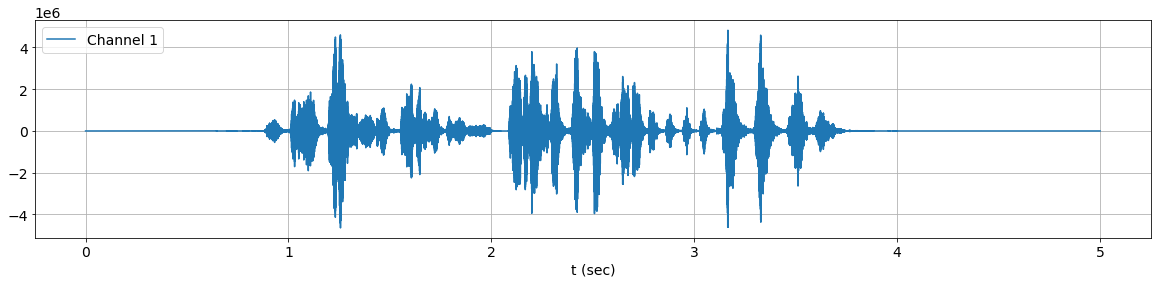

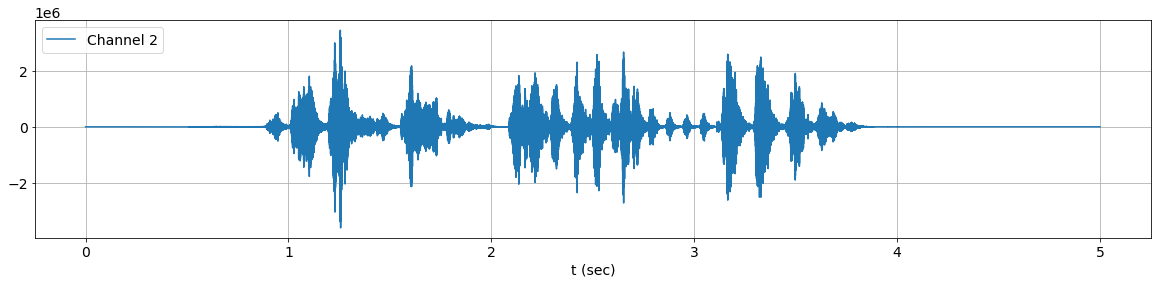

In [359]:
channel1=bird[:,0]
channel2=bird[:,1]
duration=5
num_samples=np.shape(bird)[0]
sampling_rate=num_samples/duration

t=np.linspace(0,5,num_samples)

plt.figure(figsize=(20,4))
plt.rcParams.update({'font.size':14})
plt.plot(t,channel1, label='Channel 1')
plt.xlabel('t (sec)')
plt.grid()
plt.legend(loc='upper left')
#plt.ylim([0,1])
plt.show()

plt.figure(figsize=(20,4))
plt.rcParams.update({'font.size':14})
plt.plot(t,channel2, label='Channel 2')
plt.xlabel('t (sec)')
plt.grid()
plt.legend(loc='upper left')
#plt.ylim([0,1])
plt.show()

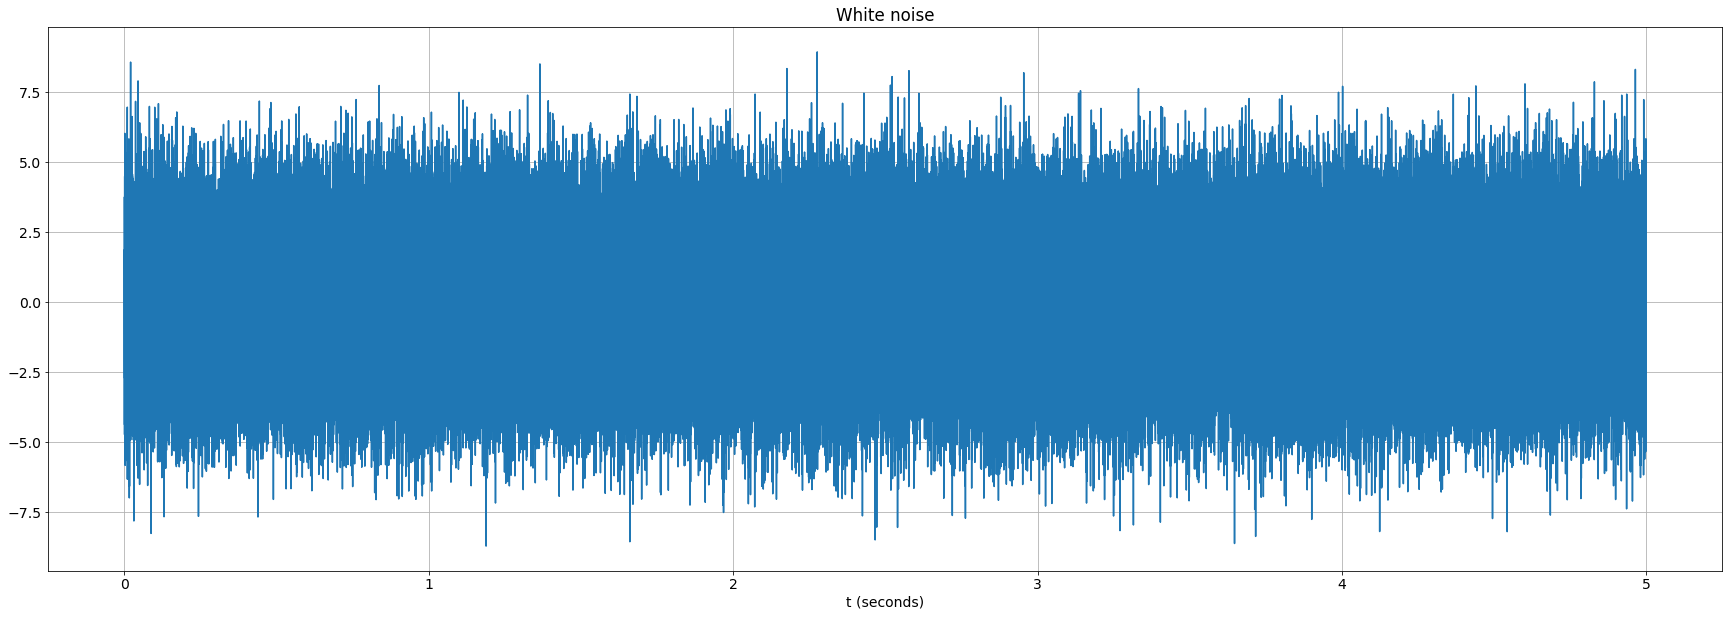

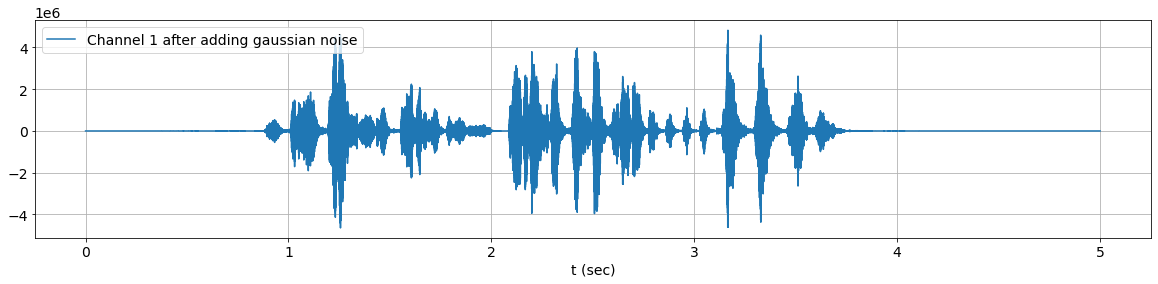

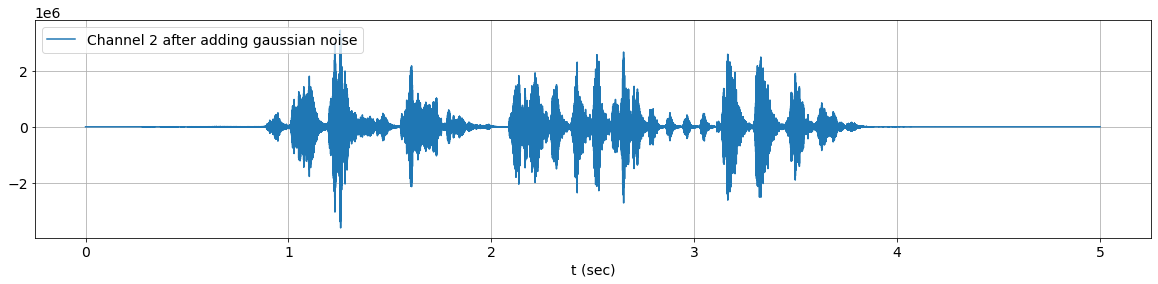

In [368]:

#  GAUSSIAN NOISE
mean = 0
std = 2
num_samples = num_samples
white = numpy.random.normal(mean, std, size=num_samples)
t=np.linspace(0,5,num_samples)

plt.figure(figsize=(30,10))
plt.plot(t,white)
plt.title('White noise')
plt.xlabel('t (seconds)')
plt.grid()
plt.show()

channel1_noisy=channel1+white
channel2_noisy=channel2+white

plt.figure(figsize=(20,4))
plt.rcParams.update({'font.size':14})
plt.plot(t,channel1_noisy, label='Channel 1 after adding gaussian noise')
plt.xlabel('t (sec)')
plt.grid()
plt.legend(loc='upper left')
#plt.ylim([0,1])
plt.show()

plt.figure(figsize=(20,4))
plt.rcParams.update({'font.size':14})
plt.plot(t,channel2_noisy, label='Channel 2 after adding gaussian noise')
plt.xlabel('t (sec)')
plt.grid()
plt.legend(loc='upper left')
#plt.ylim([0,1])
plt.show()

In [369]:
import IPython.display as ipd


#wavio.write("/content/drive/MyDrive/IIT Guwahati/IITG_DigitalSignalProcessorsLab/birds_noisy.wav", channel1_noisy, rate, sampwidth=3)
print('noisy sound')
#wavio.write("/content/drive/MyDrive/IIT Guwahati/IITG_DigitalSignalProcessorsLab/birds_noisy.wav", channel1_noisy, sampling_rate, sampwidth=3)
ipd.Audio('/content/drive/MyDrive/IIT Guwahati/IITG_DigitalSignalProcessorsLab/birds_noisy.wav') # load a local WAV file


noisy sound


Link to cell: 

https://colab.research.google.com/drive/1-iMRe1AgmgRPz35gQaXWnmRwg63yFiUr#scrollTo=OtWoGS68BFoC&line=1&uniqifier=1

https://colab.research.google.com/drive/1-iMRe1AgmgRPz35gQaXWnmRwg63yFiUr#scrollTo=7N8YdPSZ_5zn&line=1&uniqifier=1

In [370]:
print('original sound')
ipd.Audio('/content/drive/MyDrive/IIT Guwahati/IITG_DigitalSignalProcessorsLab/birds.wav') # load a local WAV file


original sound


The noisy chirps appear more shrill. These can be removed using moving average filters, synchronous averaging, etc